In [212]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Data Cleaning


In [213]:

file_path = "D:/2024/python/pythoncode/laptopusage.xlsx"
df = pd.read_excel("D:/2024/python/pythoncode/laptopusage.xlsx", sheet_name=None) 
df = pd.concat(df.values(), ignore_index=True)
output_file  = "combined_excel.xlsx"
df.to_excel(output_file, index=False)
print(f"Combined Excel file saved as: {output_file}")

Combined Excel file saved as: combined_excel.xlsx


In [214]:

output_file = 'combined_excel.xlsx'
combined_df = pd.read_excel(output_file)
combined_df

,Course,Std ID,Name,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,...,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no),course,Price _Nu,Unnamed: 25
0,D2CSN,5230111,Anisha Chettri,Hewlett-Packard,247 G8,Notebook PC,14 inches,1366 x 768,8 GB,Window 11 Pro,...,Radeon Graphics,32000,yes,yes,yes,no,yes,NaN,NaN,NaN
1,D2CSN,5230112,Bipana Rai,Hewlett-Packard,247 G8,Notebook PC,14 inches,1366 x 768,8 GB,Window 11 Pro,...,Radeon Graphics,24480,yes,yes,yes,no,yes,NaN,NaN,NaN
2,D2CSN,5230113,Chimi Gyeltshen,MSI,Modern 14 C11M,Gaming Laptop,14 inches,1920 x 1080,8 GB,windows 10 Home,...,Intel UHD Graphics,32000,yes,yes,yes,no,yes,NaN,NaN,NaN
3,D2CSN,5230114,Choden,Dell Inc,Latitude 3420,Notebook,14 inches,1366 x 768,16 GB,Window 11 Pro,...,UHD Graphics,39000,yes,yes,yes,no,yes,NaN,NaN,NaN
4,D2CSN,5230115,Dorji Chodup,Hewlett-Packard,HP 247 G8,Notebook PC,14 inches,1366 x 768,16 GB,Windows 11 Home,...,UHD Graphics,39000,yes,yes,yes,no,yes,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,5230178,Krishna Maya Rai,Dell,Null,Null,Null,Null,Null,Null,...,Null,Null,Null,Null,Null,Null,Null,NaN,NaN,NaN
505,D2S,5230193,Thinley choden,Dell,Latitude 3420,NaN,15.6 inches,1366 x 768,16 GB,windows 11 pro,...,NaN,54000,yes,yes,no,yes,no,NaN,NaN,NaN
506,D2S,5230174,Chimi Delkar,Dell Inc,Latitude 3440,Notebook,14 inches,1366 x 768,8 GB,windows 11 Pro,...,UHD Graphics,31900,yes,yes,no,yes,yes,NaN,NaN,NaN
507,D2S,5230177,Dorji Yuden,Hewlett-Packad,Hp 240 G8,Notebook,14 inches,1366 x 768,16 Gb,Window 11 Pro,...,UHD Graphics,39000,yes,yes,no,yes,no,NaN,NaN,NaN


# Drop Extra unnecessary Columns 

In [215]:

combined_df.drop('course', axis=1, inplace=True)
combined_df.drop('Name', axis=1, inplace=True)
combined_df.drop('Std ID', axis=1, inplace=True)
combined_df.drop('HDD', axis=1, inplace=True)
combined_df.drop('Flash Storage', axis=1, inplace=True)
combined_df.drop('Unnamed: 25', axis=1, inplace=True)
combined_df.drop('Hybrid', axis=1, inplace=True)
combined_df.drop('Price _Nu', axis=1, inplace=True)
combined_df.to_excel('combined_excel.xlsx', index=False)

combined_df


,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14 inches,1366 x 768,8 GB,Window 11 Pro,AMD,Athlon PRO 3045B,2.3GHz,237 GB,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14 inches,1366 x 768,8 GB,Window 11 Pro,AMD,Athlon PRO 3045B,2.30 GHz,237 GB,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14 inches,1920 x 1080,8 GB,windows 10 Home,11th Gen Intel,core i3-1115G4,3.00 GHz,459 GB,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell Inc,Latitude 3420,Notebook,14 inches,1366 x 768,16 GB,Window 11 Pro,11th Gen Intel,Core i3-1115G4,3.00 GHz,476.92 GB,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook PC,14 inches,1366 x 768,16 GB,Windows 11 Home,AMD,Ryzen 5 3500U,2.1 GHz,476 GB,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6 inches,1366 x 768,16 GB,windows 11 pro,11th Gen Intel®,Null,2.40GHz,256GB,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell Inc,Latitude 3440,Notebook,14 inches,1366 x 768,8 GB,windows 11 Pro,12 Gen Intel,Core i3-1215U,1.2 GHz,476.92 GB,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14 inches,1366 x 768,16 Gb,Window 11 Pro,Intel,Core i3-1005G1,1.20 GHz,476.92 GB,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# checking for missing value using isnull()

In [216]:
combined_df.isnull()

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
505,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
506,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Remove string and convert it to int in column Inches, Ram, Cpu rate and SSD


In [217]:
def clean_column(value):
    if pd.isna(value) or value == '':
        return 0 
    value = str(value)
    cleaned_value = re.sub(r'[^\d.]', '', value)
    if cleaned_value == '':
        return 0
    if '.' in cleaned_value:
        try:
            return float(cleaned_value)
        except ValueError:
            return 0
    return int(cleaned_value)

combined_df['Inches'] = combined_df['Inches'].apply(clean_column)   
combined_df['Ram'] = combined_df['Ram'].apply(clean_column)         
combined_df['Cpu Rate'] = combined_df['Cpu Rate'].apply(clean_column)  
combined_df['SSD'] = combined_df['SSD'].apply(clean_column)       

combined_df.to_excel('cleaned_file.xlsx', index=False)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,windows 10 Home,11th Gen Intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell Inc,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,11th Gen Intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook PC,14.0,1366 x 768,16.0,Windows 11 Home,AMD,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,Null,0.0,Null,0.0,Null,Null,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,windows 11 pro,11th Gen Intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell Inc,Latitude 3440,Notebook,14.0,1366 x 768,8.0,windows 11 Pro,12 Gen Intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,Intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the column'Company'

In [219]:
# extract the company column 
column_data = combined_df['Company'].unique()
column_data

array(['Hewlett-Packard', 'MSI', 'Dell Inc', nan, 'Dell', 'LENOVO',
       'Apple', 'Acer', 'Null', 'DELL Inc', 'Hp', 'Asus', 'asus',
       'MacBook Air', 'Dell Inc.', 'ASUS', 'Hewlett Packard', 'HP',
       'Lenovo', 'Hewlett-Paackard', 'ASUSTeK COMPUTER INC.', 'Fujitsu',
       'DELL', 'ASUSTEK', 'ASUSTek', 'hp', 'Lenove', 'Dell inc',
       'ASUSTeK', 'acer', 'dell', 'Microsoft', 'Dell inc.',
       'Hewlett-Packad'], dtype=object)

In [220]:
data = np.array(['Hewlett-Packard', 'MSI', 'Dell Inc','Dell', 'LENOVO',
       'Apple', 'Acer', 'Null', 'DELL Inc', 'Hp', 'Asus', 'asus',
       'MacBook Air', 'Dell Inc.', 'ASUS', 'Hewlett Packard', 'HP',
       'Lenovo', 'Hewlett-Paackard', 'ASUSTeK COMPUTER INC.', 'Fujitsu',
       'DELL', 'ASUSTEK', 'ASUSTek', 'hp', 'Lenove', 'Dell inc',
       'ASUSTeK', 'acer', 'dell', 'Microsoft', 'Dell inc.'], dtype=object)

df = pd.DataFrame(data, columns=['Company'])

standardization_dict = {
    'Hewlett-Packard': 'Hewlett-Packard',
    'Hewlett Packard': 'Hewlett-Packard',
    'Hewlett-Paackard': 'Hewlett-Packard',
    'Hp': 'Hewlett-Packard',
    'hp': 'Hewlett-Packard',
    'Dell Inc': 'Dell',
    'DELL Inc': 'Dell',
    'DELL': 'Dell',
    'dell': 'Dell',
    'Dell inc': 'Dell',
    'Dell Inc.': 'Dell',
    'Dell inc.': 'Dell',
    'LENOVO': 'Lenovo',
    'Lenove': 'Lenovo',
    'ASUS': 'Asus',
    'Asus': 'Asus',
    'asus': 'Asus',
    'ASUSTEK': 'Asus',
    'ASUSTeK COMPUTER INC.': 'Asus',
    'ASUSTeK': 'Asus',
    'ASUSTek': 'Asus',
    'acer': 'Acer',
    'Null': np.nan
}

combined_df['Company'] = combined_df['Company'].replace(standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook PC,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,windows 10 Home,11th Gen Intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,11th Gen Intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook PC,14.0,1366 x 768,16.0,Windows 11 Home,AMD,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,Null,0.0,Null,0.0,Null,Null,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,windows 11 pro,11th Gen Intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,windows 11 Pro,12 Gen Intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,Intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the 'TypeName'

In [221]:
# Extract the 'TypeName' column 
column_data = combined_df['TypeName'].unique()
column_data

array(['Notebook PC', 'Gaming Laptop', 'Notebook', 'Notebook Pc', nan,
       'MacBook', 'notebook', 'IdeaPad', 'Null', 'Ultrabook',
       'Gaming laptop', 'gaming laptop', 'MacBook Air6,2',
       'Business laptop', 'Dell', 'Gaming', 'HP', 'x64- based PC',
       'x64-based PC', 'x64-based pc', 'x64-based-PC', 'NotebookPC',
       'Business notebook', 'NoteBook', 'ASUS TUF Gaming F15', 'Laptop',
       '*64-based PC', '64-bit, ×64 based', 'Chromebook', 'Convertible',
       'Business Laptop', 'dell'], dtype=object)

In [222]:
data = pd.Series([
    'Notebook PC', 'Gaming Laptop', 'Notebook', 'Notebook Pc', np.nan,
    'MacBook', 'notebook', 'IdeaPad', 'Null', 'Ultrabook',
    'Gaming laptop', 'gaming laptop', 'MacBook Air6,2',
    'Business laptop', 'Dell', 'Gaming', 'HP', 'x64- based PC',
    'x64-based PC', 'x64-based pc', 'x64-based-PC', 'NotebookPC',
    'Business notebook', 'NoteBook', 'ASUS TUF Gaming F15', 'Laptop',
    '*64-based PC', '64-bit, ×64 based', 'Chromebook', 'Convertible',
    'Business Laptop'
])

df = pd.DataFrame(data, columns=['TypeName'])

standardization_dict = {
    'Notebook PC': 'Notebook',
    'Notebook Pc': 'Notebook',
    'notebook': 'Notebook',
    'NoteBook': 'Notebook',
    'NotebookPC': 'Notebook',
    'Gaming Laptop': 'Gaming Laptop',
    'Gaming laptop': 'Gaming Laptop',
    'gaming laptop': 'Gaming Laptop',
    'ASUS TUF Gaming F15': 'Gaming Laptop',
    'Business laptop': 'Business Laptop',
    'Business Laptop': 'Business Laptop',
    'Business notebook': 'Business Laptop',
    'Ultrabook': 'Ultrabook',
    'MacBook Air6,2': 'MacBook',
    'MacBook': 'MacBook',
    'Dell': 'Laptop',
    'HP': 'Laptop',
    'Laptop': 'Laptop',
    '*64-based PC': 'x64-based PC',
    'x64- based PC': 'x64-based PC',
    'x64-based pc': 'x64-based PC',
    'x64-based-PC': 'x64-based PC',
    '64-bit, ×64 based': 'x64-based PC',
    'IdeaPad': 'Laptop',
    'Convertible': 'Convertible',
    'Chromebook': 'Chromebook',
    'Null': np.nan
}

combined_df['TypeName'] = combined_df['TypeName'].replace(standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Window 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,windows 10 Home,11th Gen Intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,11th Gen Intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,AMD,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,Null,Null,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,windows 11 pro,11th Gen Intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,windows 11 Pro,12 Gen Intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Window 11 Pro,Intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the 'OpSys'

In [223]:
# Extract the OpSys column 
column_data = combined_df['OpSys'].unique()
column_data

array(['Window 11 Pro', 'windows 10 Home', 'Windows 11 Home', nan,
       'Windows 11 Pro', 'windows 11 pro', 'Window 11 Enterprise',
       'MacOS Sierra', 'Window 11 pro', 'Window 11 home', 'window 11 pro',
       'WIndow 11 Home', 'Null', 'Window 11 Home', 'Windows 11',
       'windows 11 home', 'window 11', 'windows 11', 'window11',
       'Windows Pro 10', 'Windows 11 pro', 'window 10', 'windows 10',
       'Windows 10 Home', 'Windows 10 S', 'wndow 8.1 pro', 'windos11',
       'windows11', 'windows 11 Pro', 'window 11 Home',
       'windows 11 Enterprise', 'Windows 10 Pro', 'Window 10 Home',
       'Windows 11 Home Single Language', 'window 8.1 pro',
       'Microsoft Windows 11 pro', 'Microsoft Windows 11 Pro',
       'Windows 8.1 Pro', 'Windows 11 Home Single', 'DOS', 'Chrome OS',
       'Window11', 'window 11 home', 'windows 10 pro', 'windoes 11',
       'Window 11', 'macOS Sonoma', 'macOS Ventura', 'McOS',
       'Window 10 Pro', 'Windows 10', 'Windows 11 Home '], dtype=object

In [224]:
data = pd.Series([
    'Window 11 Pro', 'windows 10 Home', 'Windows 11 Home', np.nan,
    'Windows 11 Pro', 'windows 11 pro', 'Window 11 Enterprise',
    'MacOS Sierra', 'Window 11 pro', 'Window 11 home', 'window 11 pro',
    'WIndow 11 Home', 'Null', 'Window 11 Home', 'Windows 11',
    'windows 11 home', 'window 11', 'windows 11', 'window11',
    'Windows Pro 10', 'Windows 11 pro', 'window 10', 'windows 10',
    'Windows 10 Home', 'Windows 10 S', 'wndow 8.1 pro', 'windos11',
    'windows11', 'windows 11 Pro', 'window 11 Home',
    'windows 11 Enterprise', 'Windows 10 Pro', 'Window 10 Home',
    'Windows 11 Home Single Language', 'window 8.1 pro',
    'Microsoft Windows 11 pro', 'Microsoft Windows 11 Pro',
    'Windows 8.1 Pro', 'Windows 11 Home Single', 'DOS', 'Chrome OS',
    'Window11', 'window 11 home', 'windows 10 pro', 'windoes 11',
    'Window 11', 'macOS Sonoma', 'macOS Ventura', 'McOS',
    'Window 10 Pro', 'Windows 10'
])

os_standardization_dict = {
    'window 11 pro': 'Windows 11 Pro',
    'windows 10 home': 'Windows 10 Home',
    'windows 11 home': 'Windows 11 Home',
    'windows 11 pro': 'Windows 11 Pro',
    'window 11 enterprise': 'Windows 11 Enterprise',
    'macos sierra': 'macOS Sierra',
    'windows 10': 'Windows 10',
    'macos': 'macOS',
    'chrome os': 'Chrome OS',
    'dos': 'DOS',
    'windows 10 pro': 'Windows 10 Pro',
    'window 8.1 pro': 'Windows 8.1 Pro',
    'windows 10 s': 'Windows 10 S',
    'windows 11 home single language': 'Windows 11 Home Single Language',
    'windows 8.1 pro': 'Windows 8.1 Pro',
    'windows 11': 'Windows 11',
    'macos sonoma': 'macOS Sonoma',
    'macos ventura': 'macOS Ventura',
    'mcOS': 'macOS',
    'windows 10 pro': 'Windows 10 Pro',
    'null': np.nan,
    'window 11 home': 'Windows 11 Home',
    'windows 10 pro': 'Windows 10 Pro'
}

combined_df['OpSys'] = combined_df['OpSys'].str.lower().replace(os_standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,11th Gen Intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,11th Gen Intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,AMD,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,Null,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th Gen Intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 Gen Intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,Intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the "Cpu brand"

In [225]:
# Extract the column "Cpu brand"
column_data = combined_df['Cpu Brand'].unique()
column_data

array(['AMD', '11th Gen Intel', nan, 'Intel', '12th gen Intel', 'intel',
       'Ryzen', 'Intel ', 'intel ', 'Intel(R)', '11th Gen Intel (R)',
       'Intel Core', 'AMD Ryzen', '11th gen Intel', '11th gen iintel',
       '11th gen intel', 'intell', '11th gen intel(R)', '12th Gen intel',
       '12th Gen Intel', '11th Gen Intel(R)', '13 Gen Intel',
       '12th Gen Intel(R)', '12 Gen Intel', '11 Gen Intel',
       'Intel core i7', 'Athlon PRO 3045B', 'AMD RADEON',
       '11th Gen intel', '10th gen intel', '11 th Gen Intel',
       '12th Gen Intel (R)', '11th Geb Intel(R)', '10th Gen Intel',
       'Null', '11th Gen Inrel', 'AMD Athlon', 'Intel Celeron',
       'Intel Pentium', '11thGen intel', '10th Gen intel', 'Intel ,',
       'Apple M1', 'AMD Ryzen 9 6900HS', 'AMD A6', 'Apple M2 Max',
       'AMD A4', '11th Gen Intel®'], dtype=object)

In [226]:

cpu_standardization_dict = {
    'amd': 'AMD',
    'intel': 'Intel',
    '11th gen intel': 'Intel',
    '12th gen intel': 'Intel',
    'intel (r)': 'Intel',
    'ryzen': 'AMD Ryzen',
    'intel core': 'Intel Core',
    '12th gen intel': 'Intel',
    '11th gen iintel': 'Intel',
    'intel core i7': 'Intel Core',
    '12th gen intel(r)': 'Intel',
    '11th gen intel(r)': 'Intel',
    'intel pentium': 'Intel Pentium',
    'amd athlon': 'AMD Athlon',
    'amd radeon': 'AMD Radeon',
    'intel celeron': 'Intel Celeron',
    'apple m1': 'Apple M1',
    'apple m2 max': 'Apple M2 Max',
    'null': np.nan
}

combined_df['Cpu Brand'] = combined_df['Cpu Brand'].str.lower().replace(cpu_standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,AMD,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,Intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,Intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,AMD,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,Intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the "Cpu model"

In [227]:
# Extract the column Cpu model
column_data = combined_df['Cpu Model'].unique()
column_data

array(['Athlon PRO 3045B', 'core i3-1115G4', 'Core i3-1115G4',
       'Ryzen 5 3500U', 'Athlon Silver 3050U', nan, 'core i3 -1115G4',
       'core i5', 'core i5-1235U', 'Core i3-1115G7', 'Core i5-1135G7',
       'Core i3-1117G7', 'Pentium Silver N5030', 'Athlon Siliver 3050U',
       'Core i7-10510U', 'i5-1135G7', '11th gen i7', '12 gen i7',
       '11th gen i5', '11th Gen i5', 'Intel core I5', '12th gen i3',
       'Core(TM) i5', 'Core (TM) i5', '8th gen i5', 'Ryzen 5 5625U',
       'i5 10th gen', '11th gen i3', 'i3-1215U', '5 5500U', '3 5300U',
       'i3-1115G4', '3 3250U', '10th gen i5', '11th gen i7-1165G7',
       '11th gen core i3', 'Core i5', 'Core(TM)i5', 'core(TM)i5 -1135G7',
       'Core(TM)i5-1235U', 'Core(TM)i5-1135G7', 'AMD Ryzen 5 5600H',
       'Core i5-1335U', 'Core i7-6500U', 'AMD Ryzen 5 5500U',
       'core(TM)i5-11260H', 'Core(TM) i3-1215U', 'Core i5-11400H',
       'Celeron(R)N4020', 'Core (TM) i3', 'Core(TM) i3-1115G4',
       'Core i3-1215U', 'Ryzen 3 53ooU', 'C

In [228]:
cpu_data = pd.Series([
    'Athlon PRO 3045B', 'core i3-1115G4', 'Core i3-1115G4', 'Ryzen 5 3500U', 'Athlon Silver 3050U', np.nan,
    'core i3 -1115G4', 'core i5', 'core i5-1235U', 'Core i3-1115G7', 'Core i5-1135G7', 'Core i3-1117G7',
    'Pentium Silver N5030', 'Athlon Siliver 3050U', 'Core i7-10510U', 'i5-1135G7', '11th gen i7', '12 gen i7',
    '11th gen i5', '11th Gen i5', 'Intel core I5', '12th gen i3', 'Core(TM) i5', 'Core (TM) i5', '8th gen i5',
    'Ryzen 5 5625U', 'i5 10th gen', '11th gen i3', 'i3-1215U', '5 5500U', '3 5300U', 'i3-1115G4', '3 3250U',
    '10th gen i5', '11th gen i7-1165G7', '11th gen core i3', 'Core i5', 'Core(TM)i5', 'core(TM)i5 -1135G7',
    'Core(TM)i5-1235U', 'Core(TM)i5-1135G7', 'AMD Ryzen 5 5600H', 'Core i5-1335U', 'Core i7-6500U', 'AMD Ryzen 5 5500U',
    'core(TM)i5-11260H', 'Core(TM) i3-1215U', 'Core i5-11400H', 'Celeron(R)N4020', 'Core (TM) i3', 'Core(TM) i3-1115G4',
    'Core i3-1215U', 'Ryzen 3 53ooU', 'Core (TM) i3-1215U', 'Core i7-8550U', 'Core i3-N305', 'Core (TM) i5-1135G7',
    '2.3GHz', 'core i7-1255U', 'ATHLON Silver', 'Corei5-11356G', 'Corei5-1135G7', 'Corei5 -1135G7', 'Core i5 -1135G7',
    'Core i7-1060U', 'Core(TM)2 Duo', 'Core i3-6006U', 'Core(TN) i5-11400H', 'core i5-10210U', 'Null', 'Core i5-10300H',
    'Ryzen 7 3700U', 'Core i7-1365G7', 'Core i5-6300U', 'celeron(R)N4020', 'Core i9-13980HX', 'I5-1145G7', 'Ryzen 3 5300U',
    '12th generation Intel (R) core(TM) i7', 'i3 - 1220 P', 'i7-1165G7', 'i5-11320H', 'Core i3-5005U', '3020e',
    'Core i5-10210U', 'N4020', 'i3-10110U', 'N4000', 'Core(TM) i3-5005U', 'Core i5-1235U', 'N5030', 'Ryzen 5 5500U',
    'Core i5-1145G7', 'N3350', 'corei5', 'core i5-1135G7', 'i7-12700H', 'G8 Ryzen5', '33250U', 'Core(TM) i5-11320H',
    'core(TM)i3-121', 'core(TM)i3-122', 'Core i5-1334U', 'Core i7-12700H', '8-core', 'i3-1005G1', 'Ryzen 9 6900HS',
    'i5-10210U', '9220e', '3 3200U', '12-core', 9120, 'Core 17-1255U', 'Core i5-1240P', 'Core i5-11300H', 'Core i7-1255U',
    'Core(TM) i5-1235U', 'Core(TM) i5-4200U', 'Core(TM) i5-1135G4', 'Core(TM) i5-1145G7', 'Core(TM) i5-8265U', 'i3-8145U',
    '3 3400U', 'i5-8265U', 'i7-10510U', 'TM i5-10300H', 'Celeron N4020', 'i3-1125G4', 'Celeron N4000', 'Celeron N4500',
    'A4-9120', 'Celeron N3350', 'Pentium 5405U', 'i5-1035G1', 'i5-10300H', 'i5-1035G4', 'i7-10750H', '7 5800H', 'i7-1065G7'
])

cpu_standardization_dict = {
    'core i3-1115g4': 'Core i3-1115G4',
    'core i3 -1115g4': 'Core i3-1115G4',
    'core i3-1115g7': 'Core i3-1115G7',
    'core i5': 'Core i5',
    'core i5-1235u': 'Core i5-1235U',
    'core i7-1255u': 'Core i7-1255U',
    'core i3': 'Core i3',
    'core i5-1135g7': 'Core i5-1135G7',
    'core i7-1060u': 'Core i7-1060U',
    'core i5-11400h': 'Core i5-11400H',
    'core i5-1135g4': 'Core i5-1135G4',
    'core i5-1335u': 'Core i5-1335U',
    'core i3-1215u': 'Core i3-1215U',
    'core i7': 'Core i7',
    'core i7-1365g7': 'Core i7-1365G7',
    'core i9-13980hx': 'Core i9-13980HX',
    'intel core i5': 'Intel Core i5',
    'intel core i7': 'Intel Core i7',
    'intel core i3': 'Intel Core i3',
    'ryzen 5': 'Ryzen 5',
    'amd athlon': 'AMD Athlon',
    'amd ryzen': 'AMD Ryzen',
    'ryzen 7': 'Ryzen 7',
    'pentium': 'Pentium',
    'celeron': 'Celeron',
    'null': np.nan
}

combined_df['Cpu Brand'] = combined_df['Cpu Brand'].str.lower().replace(cpu_standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,AMD,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,Null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,Nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the "Gpu Brand"

In [229]:
# Extract the column GPU Brand
column_data = combined_df['Gpu Brand'].unique()
column_data

array(['AMD', 'Intel', nan, 'intel', 'Null', 'RTX 3050', 'RTX 2060',
       'Intel(R)', 'GTX1650', 'RTX 2050', 'Intel (R)', 'MX450\n',
       'RTX 3049', 'Intel(R) UHD', 'intel(R) core(TM)', 'Intel UHD',
       'AMD Radeon', 'Intel(R) core(TM)', 'intel(R)Core(TM)', '-',
       'intel(R)', 'AMD Radeon™', 'NVIDIA',
       'intel(R)iris(R) Xe. Graphics', 'Nvidia GeForce', 'Intel Iris',
       'GeForce RTX 3050', 'Apple', 'Intel(R) UHD graphics',
       'UHD Graphics Xe G3', 'Intel ', 'Nvidia'], dtype=object)

In [230]:
array = pd.Series([
    'AMD', 'Intel', np.nan, 'intel', 'Null', 'RTX 3050', 'RTX 2060',
    'Intel(R)', 'GTX1650', 'RTX 2050', 'Intel (R)', 'MX450\n',
    'RTX 3049', 'Intel(R) UHD', 'intel(R) core(TM)', 'Intel UHD',
    'AMD Radeon', 'Intel(R) core(TM)', 'intel(R)Core(TM)', '-', 'intel(R)',
    'AMD Radeon™', 'NVIDIA', 'intel(R)iris(R) Xe. Graphics',
    'Nvidia GeForce', 'Intel Iris', 'GeForce RTX 3050', 'Apple',
    'Intel(R) UHD graphics', 'UHD Graphics Xe G3', 'Intel '
])

standardization_dict = {
    'AMD': 'AMD',
    'AMD Radeon': 'AMD',
    'AMD Radeon™': 'AMD',
    'Intel': 'Intel',
    'intel': 'Intel',
    'Intel(R)': 'Intel',
    'Intel (R)': 'Intel',
    'Intel(R) UHD': 'Intel',
    'Intel UHD': 'Intel',
    'Intel(R) core(TM)': 'Intel',
    'intel(R) core(TM)': 'Intel',
    'intel(R)Core(TM)': 'Intel',
    'Intel Iris': 'Intel',
    'Intel(R) UHD graphics': 'Intel',
    'UHD Graphics Xe G3': 'Intel',
    'RTX 3050': 'NVIDIA RTX 3050',
    'RTX 2060': 'NVIDIA RTX 2060',
    'RTX 2050': 'NVIDIA RTX 2050',
    'RTX 3049': 'NVIDIA RTX 3049',
    'GTX1650': 'NVIDIA GTX 1650',
    'GeForce RTX 3050': 'NVIDIA RTX 3050',
    'Nvidia GeForce': 'NVIDIA',
    'NVIDIA': 'NVIDIA',
    'MX450\n': 'NVIDIA MX450',
    'Apple': 'Apple',
    'Null': 0,
    '-': 0,
    np.nan: 0
}

combined_df['Gpu Brand'] = combined_df['Gpu Brand'].str.lower().replace(standardization_dict)
combined_df



,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,Radeon Graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,Radeon Graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,Intel UHD Graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,UHD Graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,null,Null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,NaN,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,UHD Graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,UHD Graphics,39000,yes,yes,no,yes,no


# Synchronize the "Gpu Model"

In [231]:
# Extract the column Flash Storage
column_data = combined_df['Gpu Model'].unique()
column_data

array(['Radeon Graphics', 'Intel UHD Graphics', 'UHD Graphics', nan,
       'HD Graphics 5000', 'Iris Xe Graphics', 'HD Graphics',
       'UHD Graphics 605', 'Null', 'Geforce RTX', 'rtx', 'FX506HC', '-',
       'GEFORCE GTX', 'Getforce RTX', 'Iris(R)Xe Graphics',
       'HD Graphics Family', 'Iris(R) Xe Graphics', 'GeForce mx',
       'GeForce RTX', 'Intel(R) UHD', 'intel(R) core(TM)',
       'Integrated Graphics', 'Integrated Vega 7', 'Vega 6 Graphics',
       'Intel(R) core (TM)', 'intel(R)Core (TM)', 'UD Graphics',
       'GeForce GTX', 'AMD Radeon Graphics', 'GeForce GTX 2050',
       'Radeon (TN) Graphics', 'Radeon (TM) Graphics',
       'Radeon(TM) Graphics', 'HD Graphics 520', 'Xe Graphics',
       'iRISGraphics', 'UDH Graphics', 'AMD RADEON graphics',
       'A Geforce GTX 1650', '4 Series Express Chipset',
       'Intel (R) UHD Graphics', 'NVIDIA GeForce GTX 1650',
       'Intel Iris Xe Graphics', 'Radeon Rx Vega 10 Ghraphics', 'Iris Xe',
       'Integrated HD 520', 'Integrate

In [232]:
gpu_array = pd.Series([
    'Radeon Graphics', 'Intel UHD Graphics', 'UHD Graphics', np.nan,
    'HD Graphics 5000', 'Iris Xe Graphics', 'HD Graphics',
    'UHD Graphics 605', 'Null', 'Geforce RTX', 'rtx', 'FX506HC', '-',
    'GEFORCE GTX', 'Getforce RTX', 'Iris(R)Xe Graphics',
    'HD Graphics Family', 'Iris(R) Xe Graphics', 'GeForce mx',
    'GeForce RTX', 'Intel(R) UHD', 'intel(R) core(TM)',
    'Integrated Graphics', 'Integrated Vega 7', 'Vega 6 Graphics',
    'Intel(R) core (TM)', 'intel(R)Core (TM)', 'UD Graphics',
    'GeForce GTX', 'AMD Radeon Graphics', 'GeForce GTX 2050',
    'Radeon (TN) Graphics', 'Radeon (TM) Graphics',
    'Radeon(TM) Graphics', 'HD Graphics 520', 'Xe Graphics',
    'iRISGraphics', 'UDH Graphics', 'AMD RADEON graphics',
    'A Geforce GTX 1650', '4 Series Express Chipset',
    'Intel (R) UHD Graphics', 'NVIDIA GeForce GTX 1650',
    'Intel Iris Xe Graphics', 'Radeon Rx Vega 10 Ghraphics', 'Iris Xe',
    'Integrated HD 520', 'Integrated UHD', 'GeForce RTX 4080',
    'Iris Xe graphics', 'Integrated Radeon', '31.0.101.4502',
    'Integrated Iris Xe', 'GTX 1650', 'Vega 3 Graphics',
    'HD Graphics 5500', 'Integrated', 'RX 6700S', 'R4 Graphics',
    'R3 Graphics', 'GeForce MX450', 'GeForce GTX 1650',
    'Radeon(TM) 520', 'Nvidia GeForce MX330', 'RTX 3060'
])

gpu_standardization_dict = {
    # AMD GPUs
    'Radeon Graphics': 'AMD Radeon',
    'AMD Radeon Graphics': 'AMD Radeon',
    'Radeon (TN) Graphics': 'AMD Radeon',
    'Radeon (TM) Graphics': 'AMD Radeon',
    'Radeon(TM) Graphics': 'AMD Radeon',
    'RX 6700S': 'AMD Radeon RX 6700S',
    'R4 Graphics': 'AMD Radeon R4',
    'R3 Graphics': 'AMD Radeon R3',
    'Radeon(TM) 520': 'AMD Radeon 520',
    'Vega 6 Graphics': 'AMD Vega 6',
    'Vega 3 Graphics': 'AMD Vega 3',
    'Radeon Rx Vega 10 Ghraphics': 'AMD Radeon RX Vega 10',

    # Intel GPUs
    'Intel UHD Graphics': 'Intel UHD',
    'UHD Graphics': 'Intel UHD',
    'HD Graphics 5000': 'Intel HD',
    'Iris Xe Graphics': 'Intel Iris Xe',
    'HD Graphics': 'Intel HD',
    'UHD Graphics 605': 'Intel UHD',
    'Intel(R) UHD': 'Intel UHD',
    'intel(R) core(TM)': 'Intel Core',
    'Intel(R) core (TM)': 'Intel Core',
    'intel(R)Core (TM)': 'Intel Core',
    'Intel(R) UHD Graphics': 'Intel UHD',
    'HD Graphics Family': 'Intel HD',
    'Integrated Graphics': 'Intel Integrated',
    'Integrated HD 520': 'Intel Integrated HD 520',
    'Integrated UHD': 'Intel Integrated UHD',
    'Integrated Vega 7': 'Intel Integrated Vega 7',
    'Integrated Iris Xe': 'Intel Iris Xe',
    'Integrated Radeon': 'AMD Integrated Radeon',
    'HD Graphics 520': 'Intel HD 520',
    'HD Graphics 5500': 'Intel HD 5500',
    'Xe Graphics': 'Intel Iris Xe',
    'iRISGraphics': 'Intel Iris',
    'UD Graphics': 'Intel UHD',
    'UDH Graphics': 'Intel UHD',

    # NVIDIA GPUs
    'Geforce RTX': 'NVIDIA RTX',
    'rtx': 'NVIDIA RTX',
    'GEFORCE GTX': 'NVIDIA GTX',
    'Getforce RTX': 'NVIDIA RTX',
    'GeForce mx': 'NVIDIA MX',
    'GeForce RTX': 'NVIDIA RTX',
    'GeForce GTX': 'NVIDIA GTX',
    'GeForce GTX 2050': 'NVIDIA GTX 2050',
    'A Geforce GTX 1650': 'NVIDIA GTX 1650',
    'NVIDIA GeForce GTX 1650': 'NVIDIA GTX 1650',
    'GeForce MX450': 'NVIDIA MX450',
    'GeForce GTX 1650': 'NVIDIA GTX 1650',
    'Nvidia GeForce MX330': 'NVIDIA MX330',
    'RTX 3060': 'NVIDIA RTX 3060',
    'GeForce RTX 4080': 'NVIDIA RTX 4080',

    'Null': 0,
    '-': 0,
    np.nan: 0,
    '31.0.101.4502': 0,
    'FX506HC': 0,
    '4 Series Express Chipset': 0
}

cpu_data_cleaned = cpu_data.str.lower().replace(gpu_standardization_dict)

combined_df['Gpu Model'] = combined_df['Gpu Model'].str.lower().replace(gpu_standardization_dict)
combined_df

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,intel uhd graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,uhd graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,null,null,Null,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,0,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,uhd graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,uhd graphics,39000,yes,yes,no,yes,no


# Synchronize price_Nu

In [234]:
# Extract the column Price_Nu
column_data = combined_df['Price_Nu'].unique()
column_data

array([32000, 24480, 39000, 35000, nan, 40000, 24000, 23000, 33000, 60000,
       50000, 49850, 37000, 38000, 69800, 589.29, 49997, 80000, 58262,
       44980, 47000, 120000, 49000, 53000, 31000, 40980, 78000, 56705,
       36000, 69000, 52000, 29000, 43000, 55900, 82000, 42000, 56000,
       32500, 34500, 45000, 52600, 34000, 48000, 41000, 30000, 56200,
       58000, 54000, 70000, 'Null', 57000, 476.99, 561, 32400, 19000,
       51000, 52400, 39900, 46000, 43980, 39980, 22000, 27000, 18000,
       20000, 59000, 55000, 40580, 28000, 25000, 44000, 42980, 600, 22900,
       42900, 24500, 21500, 26000, 31500, 57990, 72000, 63000, 65000,
       31900], dtype=object)

In [235]:
data_array = pd.Series([
    32000, 24480, 39000, 35000, np.nan, 40000, 24000, 23000, 33000, 60000,
    50000, 49850, 37000, 38000, 69800, 589.29, 49997, 80000, 58262,
    44980, 47000, 120000, 49000, 53000, 31000, 40980, 78000, 56705,
    36000, 69000, 52000, 29000, 43000, 55900, 82000, 42000, 56000,
    32500, 45000, 52600, 34000, 48000, 41000, 30000, 56200, 58000,
    54000, 70000, 'Null', 57000, 476.99, 561, 32400, 19000, 51000,
    52400, 39900, 46000, 43980, 39980, 22000, 27000, 18000, 20000,
    59000, 55000, 40580, 28000, 25000, 44000, 42980, 600, 22900, 42900,
    24500, 21500, 26000, 31500, 57990, 72000, 63000, 65000
])
combined_df['Price_Nu'] = combined_df['Price_Nu'].replace('Null', 0).fillna(0)
combined_df['Price_Nu'] = combined_df['Price_Nu'].apply(lambda x: int(x) if isinstance(x, (float, int)) else 0)
combined_df

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\2341990557.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['Price_Nu'] = combined_df['Price_Nu'].replace('Null', 0).fillna(0)


,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,intel uhd graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,uhd graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,null,null,0,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,0,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,uhd graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,uhd graphics,39000,yes,yes,no,yes,no


# checking for missing value using isnull()

In [237]:
combined_df.isnull()

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,False,False,False,True,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
505,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
506,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
507,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [238]:
combined_df.isnull().sum()

Course                                                 41
Company                                               121
Product                                               117
TypeName                                              129
Inches                                                  0
ScreenResolution                                      121
Ram                                                     0
OpSys                                                 123
Cpu Brand                                             125
Cpu Model                                             121
Cpu Rate                                                0
SSD                                                     0
Gpu Brand                                               0
Gpu Model                                               0
Price_Nu                                                0
research and writing(yes/no)                           85
online Video Lecture(yes/no)                           85
Programming(ye

# Checking for the Missing value using notnull()

In [239]:
combined_df.notnull()

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,True,True,True,False,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True
505,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
506,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
507,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [240]:
combined_df.notnull().sum()

Course                                                468
Company                                               388
Product                                               392
TypeName                                              380
Inches                                                509
ScreenResolution                                      388
Ram                                                   509
OpSys                                                 386
Cpu Brand                                             384
Cpu Model                                             388
Cpu Rate                                              509
SSD                                                   509
Gpu Brand                                             509
Gpu Model                                             509
Price_Nu                                              509
research and writing(yes/no)                          424
online Video Lecture(yes/no)                          424
Programming(ye

# Counting missing values in a column wise

In [241]:
# count missing values in a "Company"
missing_count = combined_df['Company'].isnull().sum()
missing_count

np.int64(121)

In [242]:
# Count missing values in a 'Product'
missing_count = combined_df['Product'].isnull().sum()
missing_count

np.int64(117)

In [243]:
# Count missing values in a 'Typename'
missing_count = combined_df['TypeName'].isnull().sum()
missing_count

np.int64(129)

In [244]:
# Count missing values in a 'Inches'
missing_count = combined_df['Inches'].isnull().sum()
missing_count

np.int64(0)

In [245]:
# Count missing values in a 'ScreenResolution'
missing_count = combined_df['ScreenResolution'].isnull().sum()
missing_count

np.int64(121)

In [246]:
# Count missing values in a 'Ram'
missing_count = combined_df['Ram'].isnull().sum()
missing_count

np.int64(0)

In [247]:
# Count missing values in a 'OpSys'
missing_count = combined_df['OpSys'].isnull().sum()
missing_count

np.int64(123)

In [248]:
# Count missing values in a 'Cpu Brand'
missing_count = combined_df['Cpu Brand'].isnull().sum()
missing_count

np.int64(125)

In [249]:
# Count missing values in a 'Cpu Model'
missing_count = combined_df['Cpu Model'].isnull().sum()
missing_count

np.int64(121)

In [250]:
# Count missing values in a 'Cpu Rate'
missing_count = combined_df['Cpu Rate'].isnull().sum()
missing_count

np.int64(0)

In [251]:
# Count missing values in a 'SSD'
missing_count = combined_df['SSD'].isnull().sum()
missing_count

np.int64(0)

In [252]:
# Count missing values in a 'Gpu Brand'
missing_count = combined_df['Gpu Brand'].isnull().sum()
missing_count

np.int64(0)

In [253]:
# Count missing values in a 'Gpu Model'
missing_count = combined_df['Gpu Model'].isnull().sum()
missing_count

np.int64(0)

In [254]:
# Count missing values in a 'Price_Nu'
missing_count = combined_df['Price_Nu'].isnull().sum()
missing_count

np.int64(0)

In [326]:
combined = combined_df.duplicated()
combined


0      False
1      False
2      False
3      False
4      False
       ...  
504    False
505    False
506    False
507    False
508    False
Length: 509, dtype: bool

# Detecting and removing outliers

In [255]:
df1=combined_df
df1

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8.0,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,intel uhd graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,uhd graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0.0,NaN,NaN,Null,0.0,0.00,null,null,0,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16.0,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,0,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8.0,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,uhd graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16.0,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,uhd graphics,39000,yes,yes,no,yes,no


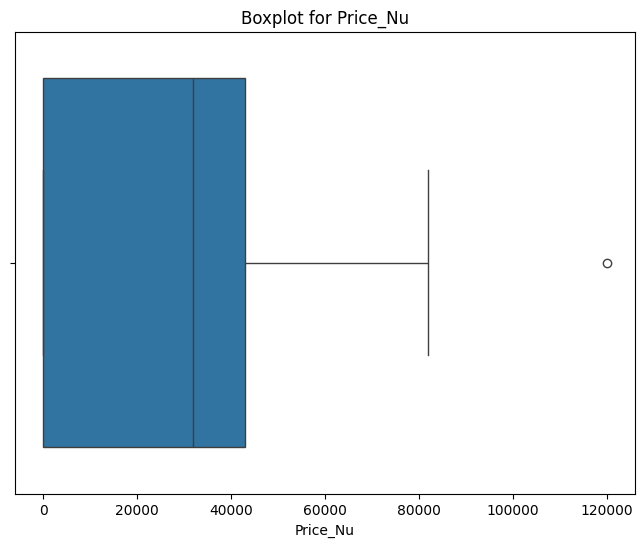

In [256]:
# Create a box plot for the column "Price_Nu"
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='Price_Nu')
plt.title('Boxplot for Price_Nu')
plt.show()

In [257]:
column_data = combined_df['Price_Nu'].unique()
column_data


array([ 32000,  24480,  39000,  35000,      0,  40000,  24000,  23000,
        33000,  60000,  50000,  49850,  37000,  38000,  69800,    589,
        49997,  80000,  58262,  44980,  47000, 120000,  49000,  53000,
        31000,  40980,  78000,  56705,  36000,  69000,  52000,  29000,
        43000,  55900,  82000,  42000,  56000,  32500,  34500,  45000,
        52600,  34000,  48000,  41000,  30000,  56200,  58000,  54000,
        70000,  57000,    476,    561,  32400,  19000,  51000,  52400,
        39900,  46000,  43980,  39980,  22000,  27000,  18000,  20000,
        59000,  55000,  40580,  28000,  25000,  44000,  42980,    600,
        22900,  42900,  24500,  21500,  26000,  31500,  57990,  72000,
        63000,  65000,  31900])

# Removing Outliers in Prices

In [258]:
price_data = np.array([ 32000,  24480,  39000,  35000,      0,  40000,  24000,  23000,
        33000,  60000,  50000,  49850,  37000,  38000,  69800,    589,
        49997,  80000,  58262,  44980,  47000, 120000,  49000,  53000,
        31000,  40980,  78000,  56705,  36000,  69000,  52000,  29000,
        43000,  55900,  82000,  42000,  56000,  32500,  45000,  52600,
        34000,  48000,  41000,  30000,  56200,  58000,  54000,  70000,
        57000,    476,    561,  32400,  19000,  51000,  52400,  39900,
        46000,  43980,  39980,  22000,  27000,  18000,  20000,  59000,
        55000,  40580,  28000,  25000,  44000,  42980,    600,  22900,
        42900,  24500,  21500,  26000,  31500,  57990,  72000,  63000,
        65000])

price_data_cleaned = price_data[~np.isnan(price_data)]
lower_bound = 0
upper_bound = 90000
price_data_cleaned = price_data_cleaned[(price_data_cleaned >= lower_bound) & (price_data_cleaned <= upper_bound)]
print('CLeaned Data (No Nan or Outliers):', price_data_cleaned)

CLeaned Data (No Nan or Outliers): [32000 24480 39000 35000     0 40000 24000 23000 33000 60000 50000 49850
 37000 38000 69800   589 49997 80000 58262 44980 47000 49000 53000 31000
 40980 78000 56705 36000 69000 52000 29000 43000 55900 82000 42000 56000
 32500 45000 52600 34000 48000 41000 30000 56200 58000 54000 70000 57000
   476   561 32400 19000 51000 52400 39900 46000 43980 39980 22000 27000
 18000 20000 59000 55000 40580 28000 25000 44000 42980   600 22900 42900
 24500 21500 26000 31500 57990 72000 63000 65000]


# Detecting and removing outliers in Inches

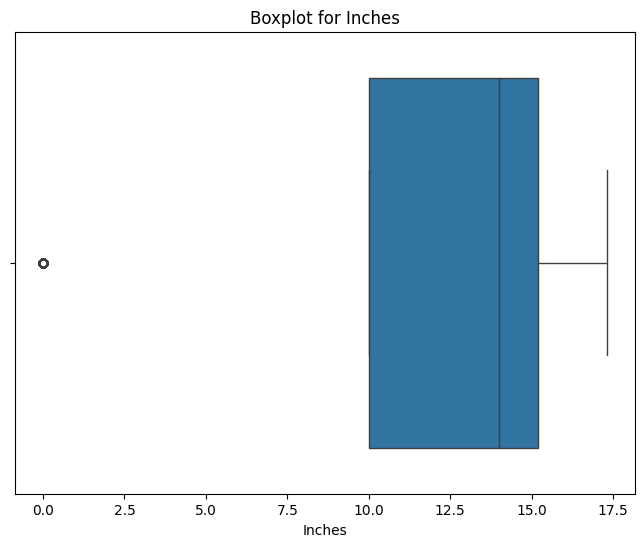

In [259]:
# Create a box plot for the column "Inches"
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Inches')
plt.title('Boxplot for Inches')
plt.show()

In [260]:
column_data = df1['Inches'].unique()
column_data

array([14. ,  0. , 11. , 15.6, 10. , 13.3, 12.5, 14.5, 15. , 16. , 15.2,
       13.4, 12. , 17.3, 13.5, 11.6, 14.4, 13. ])

# Detecting outliers in Ram

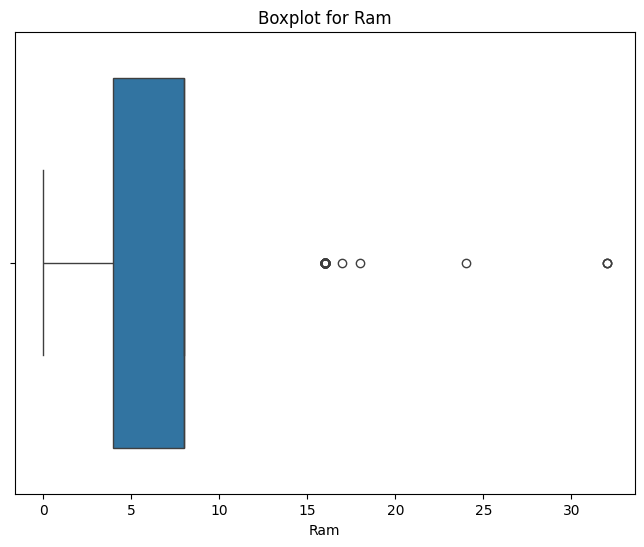

In [263]:
# Create a box plot for the column 'Ram'
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x='Ram')
plt.title('Boxplot for Ram')
plt.show()

# Removing Outliers In Ram

In [183]:
# Displayed all the data in the 'Ram' column 
column_data = df1['Ram'].unique()
column_data

array([ 8., 16.,  4.,  0., 17., 18., 32., 24.,  2.])

In [184]:
 ram_data = np.array([8., 16., 4., np.nan, 17., 18.,32.,24.,2.])
ram_data_cleaned = ram_data[~np.isnan(ram_data)]

lower_bound = 5
upper_bound = 25
ram_data_cleaned = ram_data_cleaned[(ram_data_cleaned >= lower_bound) & (ram_data_cleaned <= upper_bound)]
print('data without outliers:', ram_data_cleaned)

data without outliers: [ 8. 16. 17. 18. 24.]


# Detecting Outliers In SSD

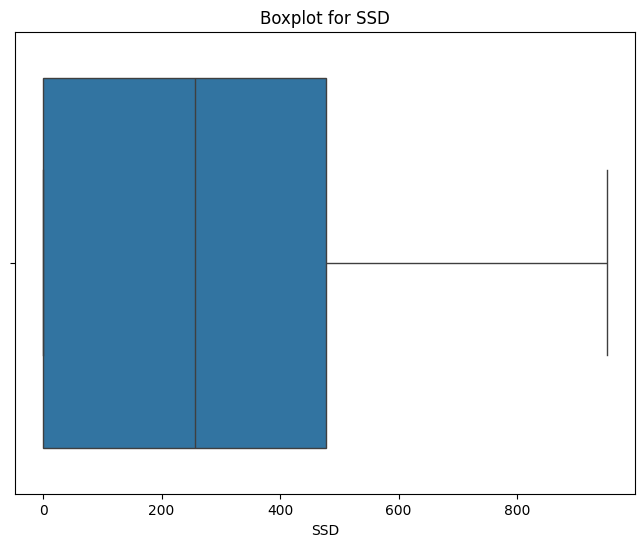

In [264]:
# Create a box plot for the column 'SSD'
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='SSD')
plt.title('Boxplot for SSD')
plt.show()

# Saving the dataframe after a datacleaning

In [265]:
df1.to_excel('cleaned_data.xlsx', index=False)

In [266]:
# Display the above file
output_file = 'cleaned_data.xlsx'
combined_df1 = pd.read_excel(output_file)

combined_df1

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,intel uhd graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,uhd graphics,39000,yes,yes,yes,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,D2S,Dell,Null,NaN,0.0,Null,0,NaN,NaN,Null,0.0,0.00,NaN,NaN,0,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,0,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,uhd graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,uhd graphics,39000,yes,yes,no,yes,no


# Data Exploraiton

In [267]:
combined_df1.head(10)

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
0,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
1,D2CSN,Hewlett-Packard,247 G8,Notebook,14.0,1366 x 768,8,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,237.00,amd,radeon graphics,24480,yes,yes,yes,no,yes
2,D2CSN,MSI,Modern 14 C11M,Gaming Laptop,14.0,1920 x 1080,8,Windows 10 Home,intel,core i3-1115G4,3.0,459.00,Intel,intel uhd graphics,32000,yes,yes,yes,no,yes
3,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,16,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,39000,yes,yes,yes,no,yes
4,D2CSN,Hewlett-Packard,HP 247 G8,Notebook,14.0,1366 x 768,16,Windows 11 Home,amd,Ryzen 5 3500U,2.1,476.00,Intel,uhd graphics,39000,yes,yes,yes,no,yes
5,D2CSN,Hewlett-Packard,245 G7,Notebook,14.0,1366 x 768,4,Windows 11 Pro,amd,Athlon Silver 3050U,2.3,237.00,amd,radeon graphics,32000,yes,yes,yes,no,yes
6,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366 x 768,8,Windows 11 Pro,intel,Core i3-1115G4,3.0,476.92,Intel,uhd graphics,35000,yes,yes,yes,no,yes
7,D2CSN,NaN,NaN,NaN,0.0,NaN,0,NaN,NaN,NaN,0.0,0.00,0,0,0,NaN,NaN,NaN,NaN,NaN
8,D2CSN,Dell,Latitude 3420,Notebook,14.0,1366×768,8,Windows 11 Pro,intel,core i3 -1115G4,3.0,480.00,amd,radeon graphics,40000,yes,yes,yes,no,yes
9,D2CSN,Lenovo,82FJ,Notebook,14.0,1366 x 768,8,Windows 11 Pro,amd,Athlon PRO 3045B,2.3,476.94,amd,radeon graphics,39000,yes,yes,yes,no,yes


In [268]:
combined_df1.tail(10)

,Course,Company,Product,TypeName,Inches,ScreenResolution,Ram,OpSys,Cpu Brand,Cpu Model,Cpu Rate,SSD,Gpu Brand,Gpu Model,Price_Nu,research and writing(yes/no),online Video Lecture(yes/no),"Programming(yes, no)","design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Performance issue(yes/no)
499,D2S,Dell,Inspiron 15,Notebook,15.6,1920 x 1080,8,Windows 10 Home,intel,Core i3-1215U,1.2,256.00,intel uhd,integrated graphics,31000,yes,yes,no,yes,yes
500,D2S,Dell,Inspiron 15,Notebook,15.6,1920 x 1080,8,Windows 10 Home,intel,Core i3-1215U,1.2,256.00,intel uhd,integrated graphics,40000,yes,yes,no,yes,no
501,D2S,Dell,dell,dell,15.6,1366 x 768,16,Windows 11 Pro,NaN,NaN,0.0,0.00,0,0,0,yes,yes,no,yes,no
502,D2S,Dell,Vostro 3420,NaN,14.0,1920 x 1080,8,windows 11 home,intel,NaN,1.3,199.00,Intel,0,54000,yes,yes,no,yes,yes
503,D2S,Dell,Dell,Laptop,14.0,1920 x 1080,8,Windows 11 Pro,11th gen intel®,Core(TM) i5-1135G7,2.6,0.00,0,0,37000,yes,yes,no,yes,yes
504,D2S,Dell,Null,NaN,0.0,Null,0,NaN,NaN,Null,0.0,0.00,NaN,NaN,0,Null,Null,Null,Null,Null
505,D2S,Dell,Latitude 3420,NaN,15.6,1366 x 768,16,Windows 11 Pro,11th gen intel®,Null,2.4,256.00,nvidia,0,54000,yes,yes,no,yes,no
506,D2S,Dell,Latitude 3440,Notebook,14.0,1366 x 768,8,Windows 11 Pro,12 gen intel,Core i3-1215U,1.2,476.92,Intel,uhd graphics,31900,yes,yes,no,yes,yes
507,D2S,Hewlett-Packad,Hp 240 G8,Notebook,14.0,1366 x 768,16,Windows 11 Pro,intel,Core i3-1005G1,1.2,476.92,Intel,uhd graphics,39000,yes,yes,no,yes,no
508,D2S,Dell,Vostro 14 3420,Notebook,14.0,1920 x 1200,16,NaN,13 gen intel,Core i5-1334U,1.3,476.92,Intel,iris xe graphics,49000,yes,yes,no,NaN,no


In [269]:
combined_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509 entries, 0 to 508
Data columns (total 20 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Course                                              468 non-null    object 
 1   Company                                             388 non-null    object 
 2   Product                                             392 non-null    object 
 3   TypeName                                            380 non-null    object 
 4   Inches                                              509 non-null    float64
 5   ScreenResolution                                    388 non-null    object 
 6   Ram                                                 509 non-null    int64  
 7   OpSys                                               386 non-null    object 
 8   Cpu Brand                                           384 non-null    object 
 9  

In [270]:
combined_df1.shape

(509, 20)

In [271]:
combined_df1.columns

Index(['Course', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Ram', 'OpSys', 'Cpu Brand', 'Cpu Model',
       'Cpu Rate', 'SSD', 'Gpu Brand', 'Gpu Model', 'Price_Nu',
       'research and writing(yes/no)', 'online Video Lecture(yes/no)',
       'Programming(yes, no)',
       'design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)',
       'Performance issue(yes/no)'],
      dtype='object')

# Analysis each column

# - Basic Summary Statistics for Numerical Columns

In [272]:
numerical_columns = ['Inches', 'Ram', 'Cpu Rate', 'SSD', 'Price_Nu']
summary_stats = combined_df1[numerical_columns].describe()

print(summary_stats)

           Inches         Ram      Cpu Rate         SSD       Price_Nu
count  509.000000  509.000000    509.000000  509.000000     509.000000
mean    10.799018    6.909627    216.336316  271.180393   27324.876228
std      6.306931    5.711544   4209.406912  214.860851   21599.537988
min      0.000000    0.000000      0.000000    0.000000       0.000000
25%     10.000000    4.000000      1.000000    0.000000       0.000000
50%     14.000000    8.000000      1.600000  256.000000   32000.000000
75%     15.200000    8.000000      2.500000  476.920000   43000.000000
max     17.300000   32.000000  94900.000000  951.000000  120000.000000


# - Distribution for Categorical Columns

In [273]:

categorical_columns = ['Course', 'Company', 'Product', 'TypeName', 'OpSys', 'Cpu Brand', 'Gpu Brand', 'Gpu Model']

for col in categorical_columns:
    print(f"\nAnalysis for {col}:")
    print(f"Most Frequent Category (Mode): {combined_df[col].mode()[0]}")
    print(f"Unique Values Count: {combined_df[col].nunique()}")
    print(f"Value Counts:\n{combined_df[col].value_counts()}")
    print(f"Percentage of Each Category:\n{combined_df[col].value_counts(normalize=True) * 100}\n")


Analysis for Course:
Most Frequent Category (Mode): D2C
Unique Values Count: 16
Value Counts:
Course
D2C      46
D1CSN    40
D2CS     39
D1M      37
D2MPM    36
D2E      36
D1MPM    34
D2M      32
D1E      32
D2CSN    28
D1S      24
D1MA     23
D2ECE    18
D1ECE    17
D1CS     16
D2S      10
Name: count, dtype: int64
Percentage of Each Category:
Course
D2C      9.829060
D1CSN    8.547009
D2CS     8.333333
D1M      7.905983
D2MPM    7.692308
D2E      7.692308
D1MPM    7.264957
D2M      6.837607
D1E      6.837607
D2CSN    5.982906
D1S      5.128205
D1MA     4.914530
D2ECE    3.846154
D1ECE    3.632479
D1CS     3.418803
D2S      2.136752
Name: proportion, dtype: float64


Analysis for Company:
Most Frequent Category (Mode): Dell
Unique Values Count: 12
Value Counts:
Company
Dell               141
Lenovo              66
Asus                49
HP                  47
Hewlett-Packard     36
Acer                32
MSI                  9
Apple                4
MacBook Air          1
Fujitsu   

# - Task Columns Analysis

In [274]:

task_columns = ['research and writing(yes/no)', 'online Video Lecture(yes/no)', 'Programming(yes, no)', 'design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)']
for col in task_columns:
    print(f"\nAnalysis for {col}:")
    print(f"Count of 'Yes' and 'No':\n{combined_df[col].value_counts()}")
    print(f"Percentage of 'Yes' and 'No':\n{combined_df[col].value_counts(normalize=True) * 100}\n")


Analysis for research and writing(yes/no):
Count of 'Yes' and 'No':
research and writing(yes/no)
yes     411
no       12
Null      1
Name: count, dtype: int64
Percentage of 'Yes' and 'No':
research and writing(yes/no)
yes     96.933962
no       2.830189
Null     0.235849
Name: proportion, dtype: float64


Analysis for online Video Lecture(yes/no):
Count of 'Yes' and 'No':
online Video Lecture(yes/no)
yes     423
Null      1
Name: count, dtype: int64
Percentage of 'Yes' and 'No':
online Video Lecture(yes/no)
yes     99.764151
Null     0.235849
Name: proportion, dtype: float64


Analysis for Programming(yes, no):
Count of 'Yes' and 'No':
Programming(yes, no)
no      330
yes      93
Null      1
Name: count, dtype: int64
Percentage of 'Yes' and 'No':
Programming(yes, no)
no      77.830189
yes     21.933962
Null     0.235849
Name: proportion, dtype: float64


Analysis for design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad):
Count of 'Yes' and 'No':
design/simulations(AutoCAD, MATLAB, ArcGIS

# Statistical Analysis Central Tendency metrics

In [276]:
numerical_columns = ['Ram', 'Cpu Rate', 'SSD', 'Price_Nu']
mean_values = combined_df[numerical_columns].mean()
median_values = combined_df[numerical_columns].median()
mode_values = combined_df[numerical_columns].mode().iloc[0]
print(mean_values)
print(median_values)
print(mode_values)

Ram             6.909627
Cpu Rate      216.336316
SSD           271.180393
Price_Nu    27324.876228
dtype: float64
Ram             8.0
Cpu Rate        1.6
SSD           256.0
Price_Nu    32000.0
dtype: float64
Ram         8.0
Cpu Rate    0.0
SSD         0.0
Price_Nu    0.0
Name: 0, dtype: float64


# Proportions and Frequencies for Categorical Variables

In [277]:
task_usage = combined_df['research and writing(yes/no)'].value_counts(normalize=True) * 100
print(task_usage)

research and writing(yes/no)
yes     96.933962
no       2.830189
Null     0.235849
Name: proportion, dtype: float64


In [278]:
task_usage = combined_df['online Video Lecture(yes/no)'].value_counts(normalize=True) * 100
print(task_usage)

online Video Lecture(yes/no)
yes     99.764151
Null     0.235849
Name: proportion, dtype: float64


In [279]:
task_usage = combined_df['Programming(yes, no)'].value_counts(normalize=True) * 100
print(task_usage)

Programming(yes, no)
no      77.830189
yes     21.933962
Null     0.235849
Name: proportion, dtype: float64


In [280]:
task_usage = combined_df['design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)'].value_counts(normalize=True) * 100
print(task_usage)

design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)
yes     60.283688
no      39.479905
Null     0.236407
Name: proportion, dtype: float64


In [281]:
task_usage = combined_df['Performance issue(yes/no)'].value_counts(normalize=True) * 100
print(task_usage)

Performance issue(yes/no)
yes     75.235849
no      24.528302
Null     0.235849
Name: proportion, dtype: float64


# Proportions of laptop Types

In [282]:
laptop_type = combined_df['TypeName'].value_counts()
laptop_type_proportions = (laptop_type / laptop_type.sum())* 100
laptop_type_proportions

TypeName
Notebook           60.526316
Laptop              7.631579
Gaming Laptop       6.842105
Ultrabook           5.789474
x64-based PC        5.000000
Business Laptop     4.736842
Chromebook          3.421053
Convertible         3.421053
Gaming              1.578947
MacBook             0.789474
dell                0.263158
Name: count, dtype: float64

#  Proportions of operating systems

In [283]:
os_counts = combined_df['OpSys'].value_counts()
os_proportions = (os_counts / os_counts.sum())*100
os_proportions

OpSys
Windows 11 Pro                     29.792746
Windows 11 Home                    19.430052
Windows 10 Home                    13.989637
Windows 10 Pro                      8.290155
Windows 11                          6.994819
Chrome OS                           4.922280
Windows 10 S                        3.626943
window 11                           3.108808
Windows 10                          2.590674
window11                            1.036269
window 10                           0.518135
microsoft windows 11 pro            0.518135
DOS                                 0.518135
Windows 8.1 Pro                     0.518135
macOS Ventura                       0.259067
macOS Sonoma                        0.259067
windoes 11                          0.259067
mcos                                0.259067
window 10 pro                       0.259067
windows 11 home single              0.259067
windows 11 enterprise               0.259067
Windows 11 Home Single Language     0.259067
wind

# Exploratory Analysis

In [284]:
task_by_course = combined_df.groupby(['Course', 'research and writing(yes/no)']).size().unstack(fill_value=0)
task_by_course

research and writing(yes/no),Null,no,yes
Course,,,
D1CS,0,0,5
D1CSN,0,0,33
D1E,0,0,24
D1ECE,0,0,17
D1M,0,0,32
D1MA,0,12,0
D1MPM,0,0,20
D1S,0,0,15
D2C,0,0,46


In [285]:
task_by_course = combined_df.groupby(['Course', 'online Video Lecture(yes/no)']).size().unstack(fill_value=0)
task_by_course

online Video Lecture(yes/no),Null,yes
Course,,
D1CS,0,5
D1CSN,0,33
D1E,0,24
D1ECE,0,17
D1M,0,32
D1MA,0,12
D1MPM,0,20
D1S,0,15
D2C,0,46


In [286]:
task_by_course = combined_df.groupby(['Course', 'Programming(yes, no)']).size().unstack(fill_value=0)
task_by_course

"Programming(yes, no)",Null,no,yes
Course,,,
D1CS,0,5,0
D1CSN,0,0,33
D1E,0,24,0
D1ECE,0,0,17
D1M,0,32,0
D1MA,0,12,0
D1MPM,0,20,0
D1S,0,15,0
D2C,0,46,0


In [287]:
task_by_course = combined_df.groupby(['Course', 'design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)']).size().unstack(fill_value=0)
task_by_course

"design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)",Null,no,yes
Course,,,
D1CS,0,0,5
D1CSN,0,33,0
D1E,0,24,0
D1ECE,0,17,0
D1M,0,0,32
D1MA,0,0,12
D1MPM,0,20,0
D1S,0,0,15
D2C,0,0,46


In [288]:
task_by_course = combined_df.groupby(['Course', 'Performance issue(yes/no)']).size().unstack(fill_value=0)
task_by_course

Performance issue(yes/no),Null,no,yes
Course,,,
D1CS,0,2,3
D1CSN,0,8,25
D1E,0,3,21
D1ECE,0,3,14
D1M,0,4,28
D1MA,0,4,8
D1MPM,0,1,19
D1S,0,8,7
D2C,0,6,40


# Correlations Between Specifications and Performance Issues

In [330]:

combined_df['Performance issue(yes/no)'] = combined_df['Performance issue(yes/no)'].map({'Yes': 1, 'No': 0})
correlation_matrix = combined_df[['Ram', 'Cpu Rate','Performance issue(yes/no)']].corr()
print(correlation_matrix)

                                Ram  Cpu Rate  Performance issue(yes/no)
Ram                        1.000000  0.075178                        NaN
Cpu Rate                   0.075178  1.000000                        NaN
Performance issue(yes/no)       NaN       NaN                        NaN


# Investigating If Laptops with Higher Specifications Are More Likely to Be Used for Heavy Tasks

In [292]:
specifications_by_task = combined_df.groupby('Programming(yes, no)')[['Ram', 'Cpu Rate']].mean()
print(specifications_by_task)

                           Ram    Cpu Rate
Programming(yes, no)                      
Null                  0.000000    0.000000
no                    8.196970  326.028076
yes                   8.731183   27.160430


In [293]:
specifications_by_task = combined_df.groupby('design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)')[['Ram', 'Cpu Rate']].mean()
print(specifications_by_task)

                                                         Ram    Cpu Rate
design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)                      
Null                                                0.000000    0.000000
no                                                  8.167665   23.162964
yes                                                 8.380392  416.649686


# Comparative Analysis

# - course-Based Comparisons:

In [331]:

course_specs = combined_df.groupby('Course')[['Ram', 'Cpu Rate']].mean()
print(course_specs)

              Ram    Cpu Rate
Course                       
D1CS     3.875000   81.787500
D1CSN    6.600000   53.912500
D1E      3.625000    1.171875
D1ECE    9.647059    1.705882
D1M      6.378378    1.516216
D1MA     6.260870   53.100000
D1MPM    3.647059    1.100000
D1S      7.166667    1.450000
D2C      6.521739    1.656522
D2CS     6.153846    1.379487
D2CSN    7.857143    2.118571
D2E      9.444444  168.376111
D2ECE    9.111111   15.616667
D2M      6.500000   76.319375
D2MPM    8.666667   35.205417
D2S     10.400000    1.240000


# - Price Range Analysis by Course

In [328]:
price_by_course = combined_df.groupby('Course')['Price_Nu'].mean()
price_by_course

Course
D1CS     14937.500000
D1CSN    31141.500000
D1E      23953.125000
D1ECE    33622.352941
D1M      34972.972973
D1MA     16217.391304
D1MPM    21176.176471
D1S      19876.541667
D2C      18869.565217
D2CS     23061.025641
D2CSN    32739.857143
D2E      38421.444444
D2ECE        0.000000
D2M      32853.125000
D2MPM    34147.222222
D2S      33590.000000
Name: Price_Nu, dtype: float64

# Course vs Ram 

In [318]:

missing_data = combined_df[['Course', 'Ram']].isnull().sum()
print(f"Missing values in 'Course' and 'Ram': \n{missing_data}")

combined_df['Ram'] = pd.to_numeric(combined_df['Ram'], errors='coerce')
combined_df_clean =combined_df.dropna(subset=['Course', 'Ram'])
ram_by_course =combined_df_clean.groupby('Course')['Ram'].unique()
print("\nUnique RAM values used in each course:")
print(ram_by_course)
ram_counts_by_course = combined_df_clean.groupby('Course')['Ram'].value_counts().unstack(fill_value=0)
print("\nFrequency of each RAM value per course:")
print(ram_counts_by_course)


Missing values in 'Course' and 'Ram': 
Course    41
Ram        0
dtype: int64

Unique RAM values used in each course:
Course
D1CS     [16.0, 24.0, 2.0, 0.0, 4.0]
D1CSN          [8.0, 4.0, 0.0, 16.0]
D1E                  [4.0, 8.0, 0.0]
D1ECE               [8.0, 16.0, 4.0]
D1M            [8.0, 4.0, 0.0, 16.0]
D1MA                [0.0, 16.0, 8.0]
D1MPM          [16.0, 4.0, 0.0, 8.0]
D1S            [8.0, 0.0, 4.0, 16.0]
D2C      [4.0, 16.0, 0.0, 8.0, 32.0]
D2CS           [0.0, 8.0, 16.0, 4.0]
D2CSN          [8.0, 16.0, 4.0, 0.0]
D2E      [8.0, 16.0, 0.0, 4.0, 32.0]
D2ECE          [8.0, 16.0, 4.0, 0.0]
D2M                 [8.0, 16.0, 0.0]
D2MPM    [8.0, 4.0, 0.0, 16.0, 32.0]
D2S                 [8.0, 16.0, 0.0]
Name: Ram, dtype: object

Frequency of each RAM value per course:
Ram     0.0   2.0   4.0   8.0   16.0  24.0  32.0
Course                                          
D1CS      11     1     1     0     2     1     0
D1CSN      7     0    16     9     8     0     0
D1E        8     0   

# Plotting

# Price- Density plot

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\512182637.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df['Price_Nu'], shade=True, color='orange')


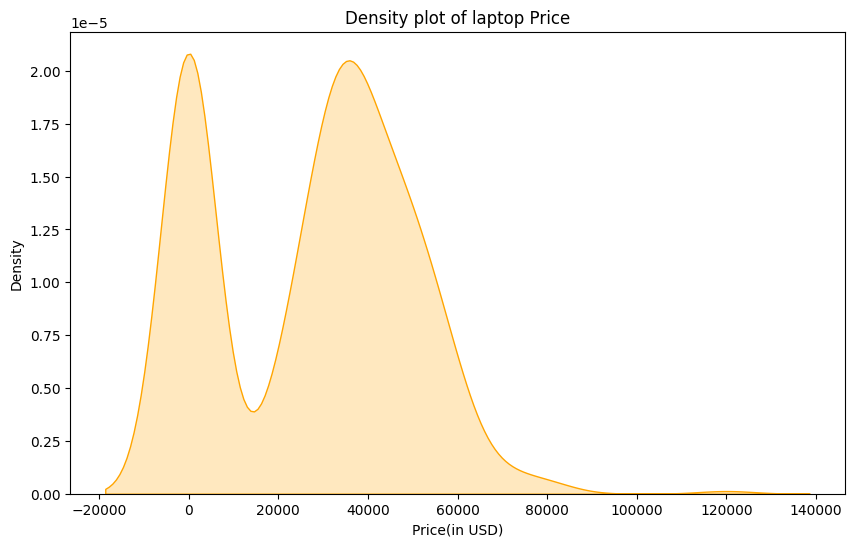

In [297]:
plt.figure(figsize=(10, 6))
sns.kdeplot(combined_df['Price_Nu'], shade=True, color='orange')

plt.title('Density plot of laptop Price')
plt.xlabel('Price(in USD)')
plt.ylabel('Density')

plt.show()

# Ram Distribution : Histrogram.

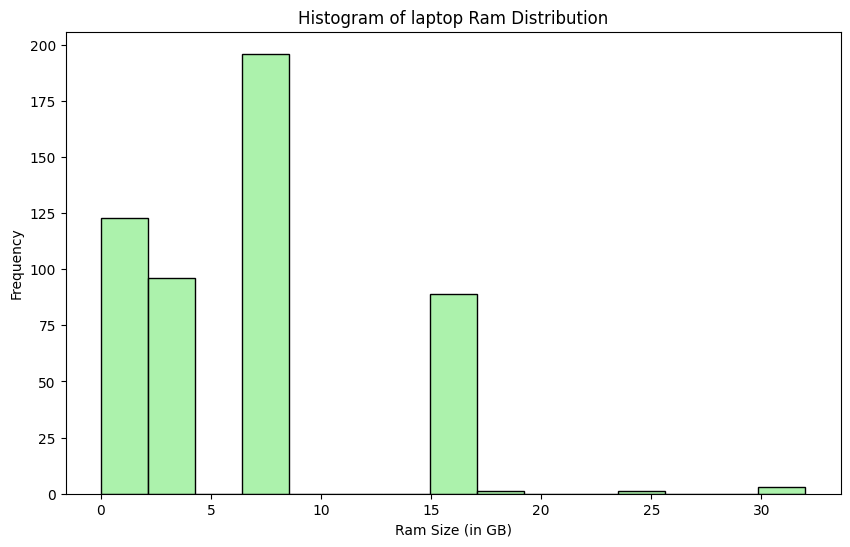

In [298]:
plt.figure(figsize=(10, 6))
sns.histplot(combined_df['Ram'], bins=15, color='lightgreen', kde=False)

plt.title('Histogram of laptop Ram Distribution')
plt.xlabel('Ram Size (in GB)')
plt.ylabel('Frequency')

plt.show()

# Operation System : Pie chart

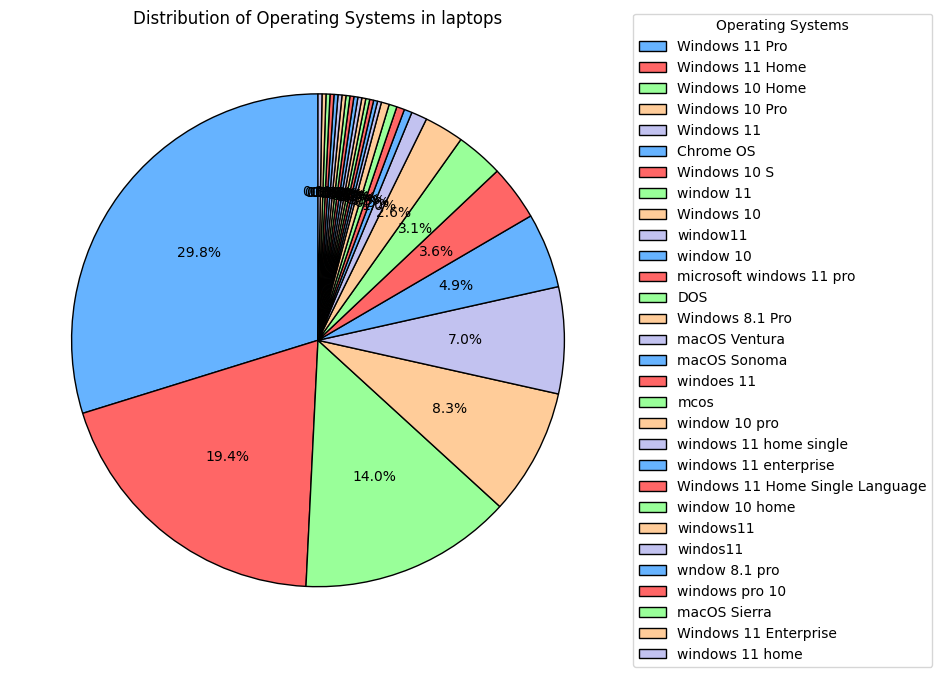

In [299]:
os_counts = combined_df['OpSys'].value_counts()

plt.figure(figsize=(8, 8))
pie_chart = plt.pie(os_counts, 
                    autopct='%1.1f%%', 
                    startangle=90, 
                    colors=['#66b3ff', '#ff6666', '#99ff99', '#ffcc99', '#c2c2f0'],
                    wedgeprops={'edgecolor': 'black'})
plt.legend(os_counts.index, 
           title="Operating Systems", 
           loc='center left', 
           bbox_to_anchor=(1, 0.5),
           fontsize=10)

plt.title('Distribution of Operating Systems in laptops')

plt.show()

# Specification Trends

# Screen Size and price(Scatter Plot + Regression line)

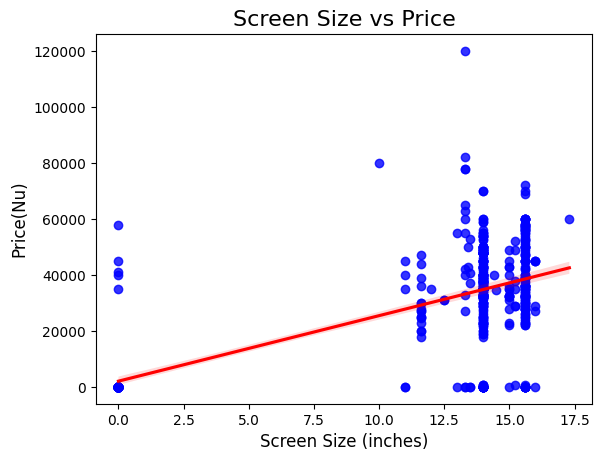

In [300]:
plt.figure(figure=(12, 6))
sns.regplot(x='Inches', y='Price_Nu', data=combined_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Screen Size vs Price', fontsize=16)
plt.xlabel('Screen Size (inches)', fontsize=12)
plt.ylabel('Price(Nu)', fontsize=12)
plt.show()

# Ram vs Price(Violin Plot)

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\940817313.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Ram', y='Price_Nu', data=combined_df, palette='coolwarm')


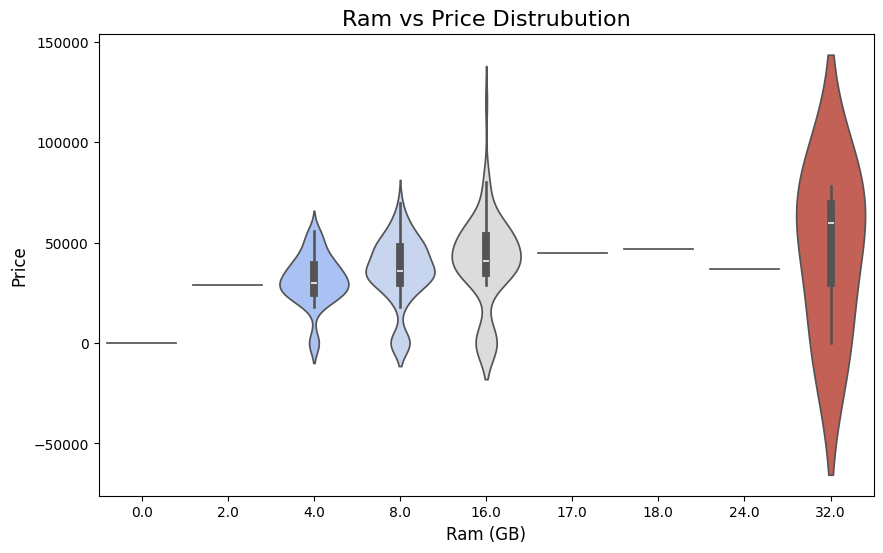

In [301]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Ram', y='Price_Nu', data=combined_df, palette='coolwarm')
plt.title('Ram vs Price Distrubution', fontsize=16)
plt.xlabel('Ram (GB)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

# Cpu Model vs Price (bar graph ) range- 10000 to 20000

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\1745659673.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu Model', y='Price_Nu', data=filtered_df, palette='muted')


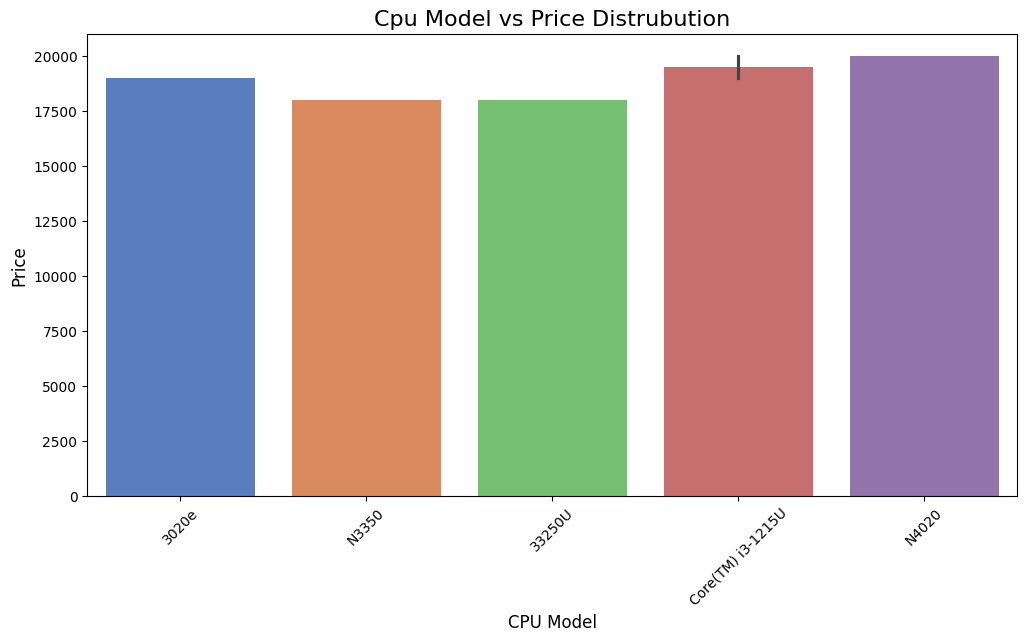

In [302]:
filtered_df = combined_df[(combined_df['Price_Nu'] >= 10000) & (combined_df['Price_Nu'] <= 20000)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Cpu Model', y='Price_Nu', data=filtered_df, palette='muted')
plt.title('Cpu Model vs Price Distrubution', fontsize=16)
plt.xlabel('CPU Model', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Cpu Model vs Price (bar graph ) range- 20000 to 30000

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\3261387182.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cpu Model', y='Price_Nu', data=filtered_df, palette='muted')


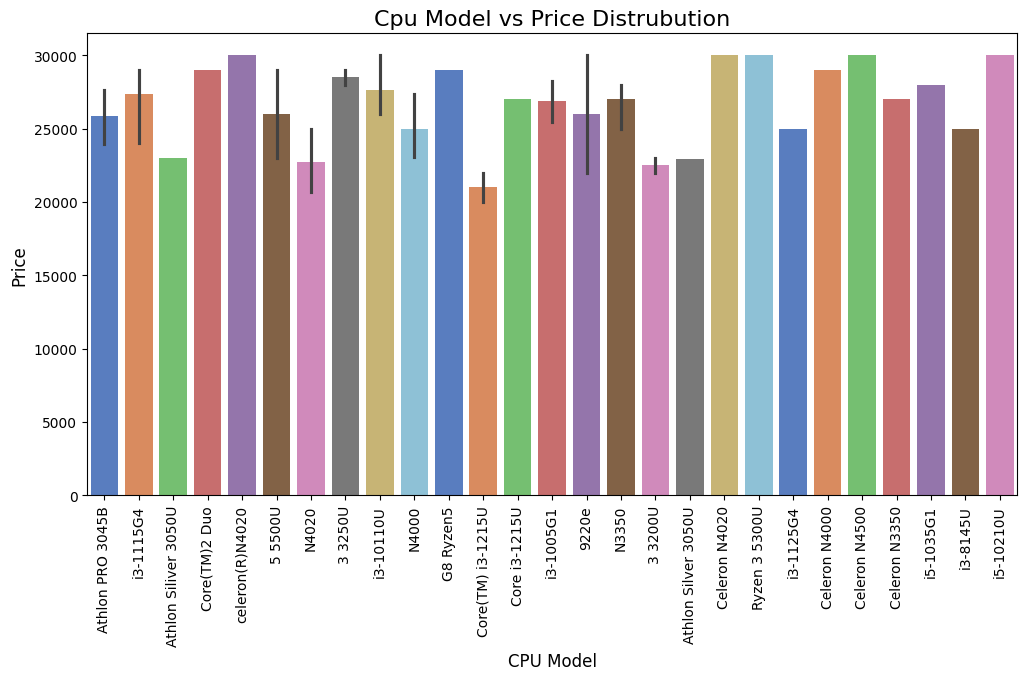

In [303]:
filtered_df = combined_df[(combined_df['Price_Nu'] >= 20000) & (combined_df['Price_Nu'] <= 30000)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Cpu Model', y='Price_Nu', data=filtered_df, palette='muted')
plt.title('Cpu Model vs Price Distrubution', fontsize=16)
plt.xlabel('CPU Model', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Price vs SSD Size (scatter Plot)

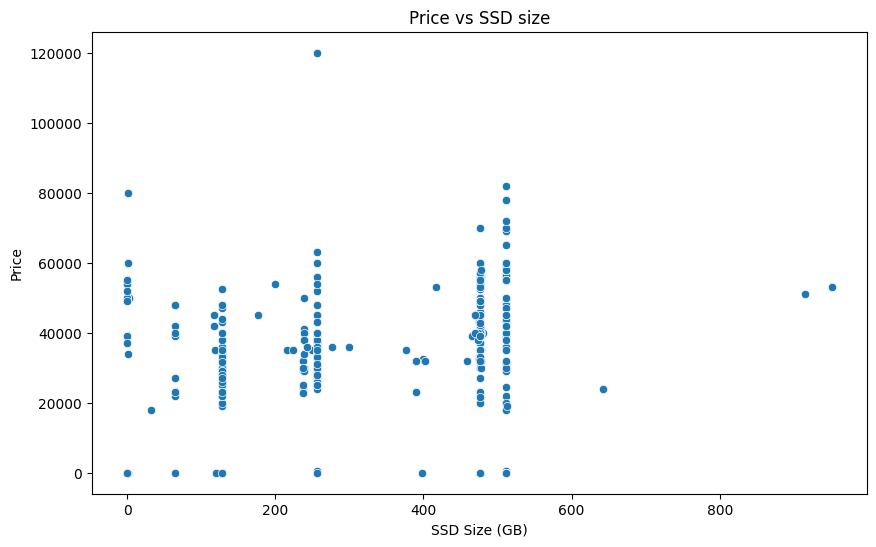

In [304]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SSD', y='Price_Nu', data=combined_df)
plt.title('Price vs SSD size')
plt.xlabel('SSD Size (GB)')
plt.ylabel('Price')
plt.show()

# Heatmap (Price-Nu, Ram, Cpu Rate, Inches, SSD)

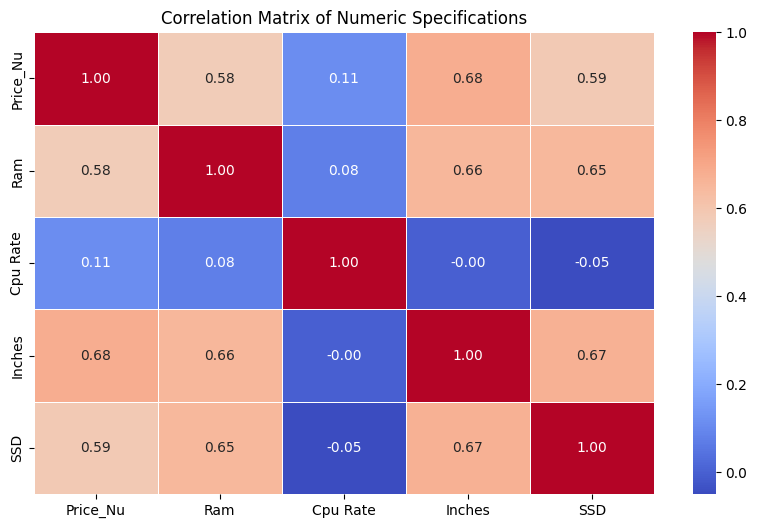

In [305]:

numeric_columns = ['Price_Nu', 'Ram', 'Cpu Rate', 'Inches', 'SSD']
correlation_matrix = combined_df[numeric_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Specifications')
plt.show()

# Brand Analysis

# Brand Analysis for laptop data

# Brand vs Price Distribution 

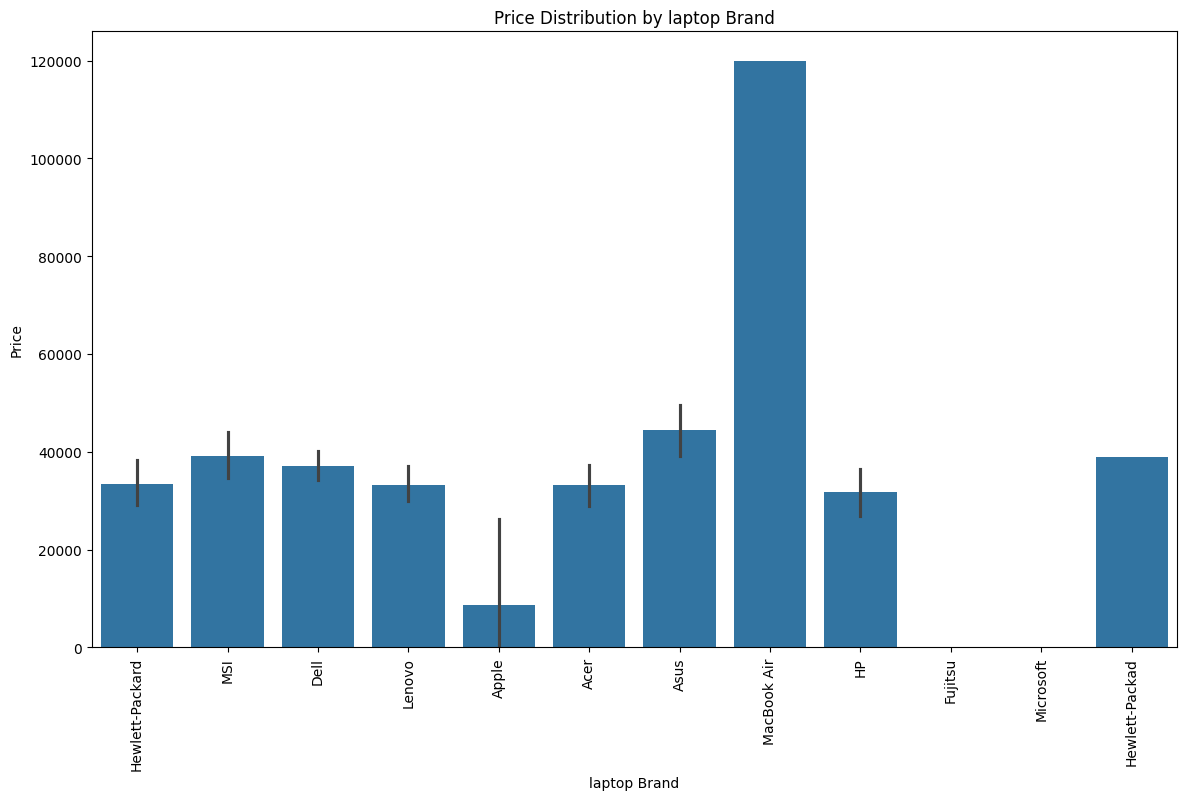

In [306]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Company', y='Price_Nu', data=combined_df)
plt.title('Price Distribution by laptop Brand')
plt.xlabel('laptop Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Average RAM, CPU Rate, and SSD by Brand

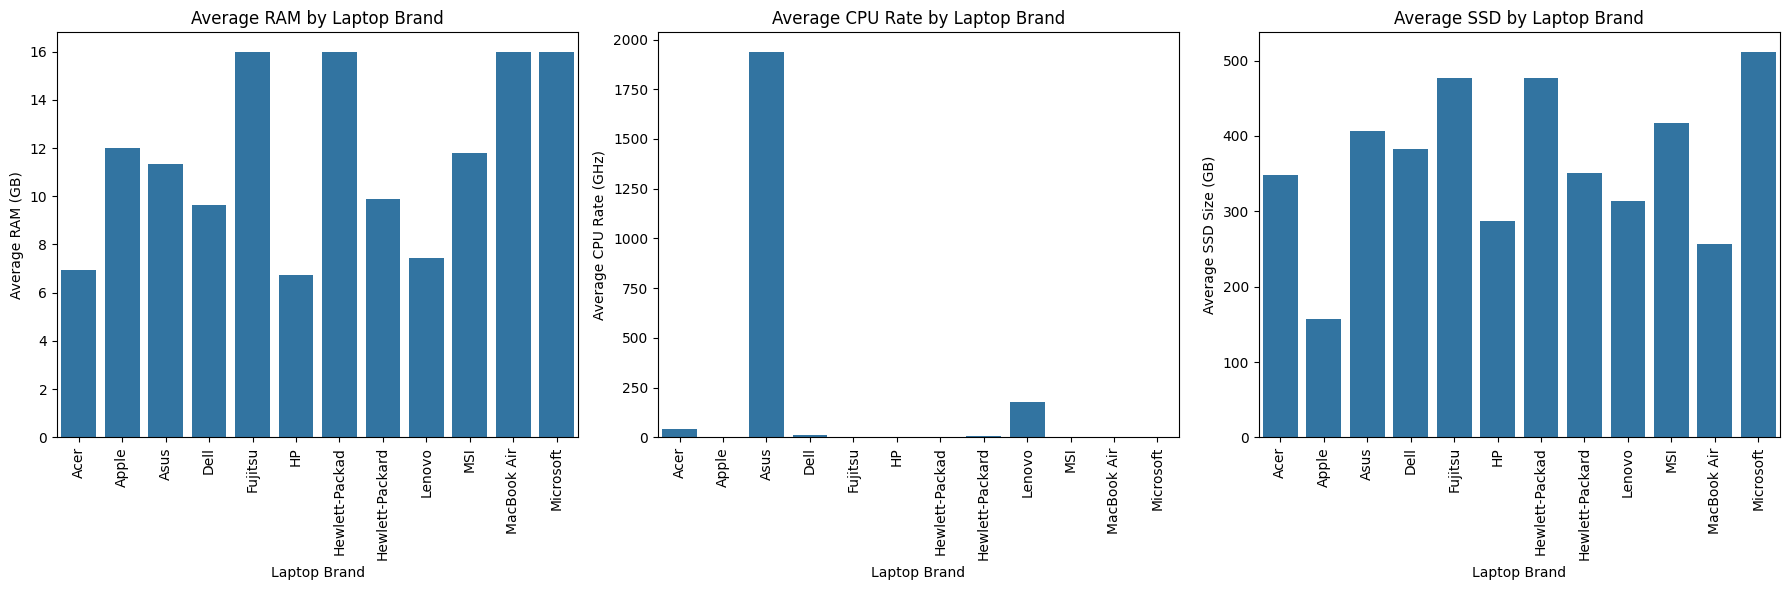

In [307]:

brand_specs = combined_df.groupby('Company')[['Ram', 'Cpu Rate', 'SSD']].mean().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# RAM by Brand
sns.barplot(x='Company', y='Ram', data=brand_specs, ax=axes[0])
axes[0].set_title('Average RAM by Laptop Brand')
axes[0].set_xlabel('Laptop Brand')
axes[0].set_ylabel('Average RAM (GB)')
axes[0].tick_params(axis='x', rotation=90)

# CPU Rate by Brand
sns.barplot(x='Company', y='Cpu Rate', data=brand_specs, ax=axes[1])
axes[1].set_title('Average CPU Rate by Laptop Brand')
axes[1].set_xlabel('Laptop Brand')
axes[1].set_ylabel('Average CPU Rate (GHz)')
axes[1].tick_params(axis='x', rotation=90)

# SSD by Brand
sns.barplot(x='Company', y='SSD', data=brand_specs, ax=axes[2])
axes[2].set_title('Average SSD by Laptop Brand')
axes[2].set_xlabel('Laptop Brand')
axes[2].set_ylabel('Average SSD Size (GB)')
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# GPU Brand by Company

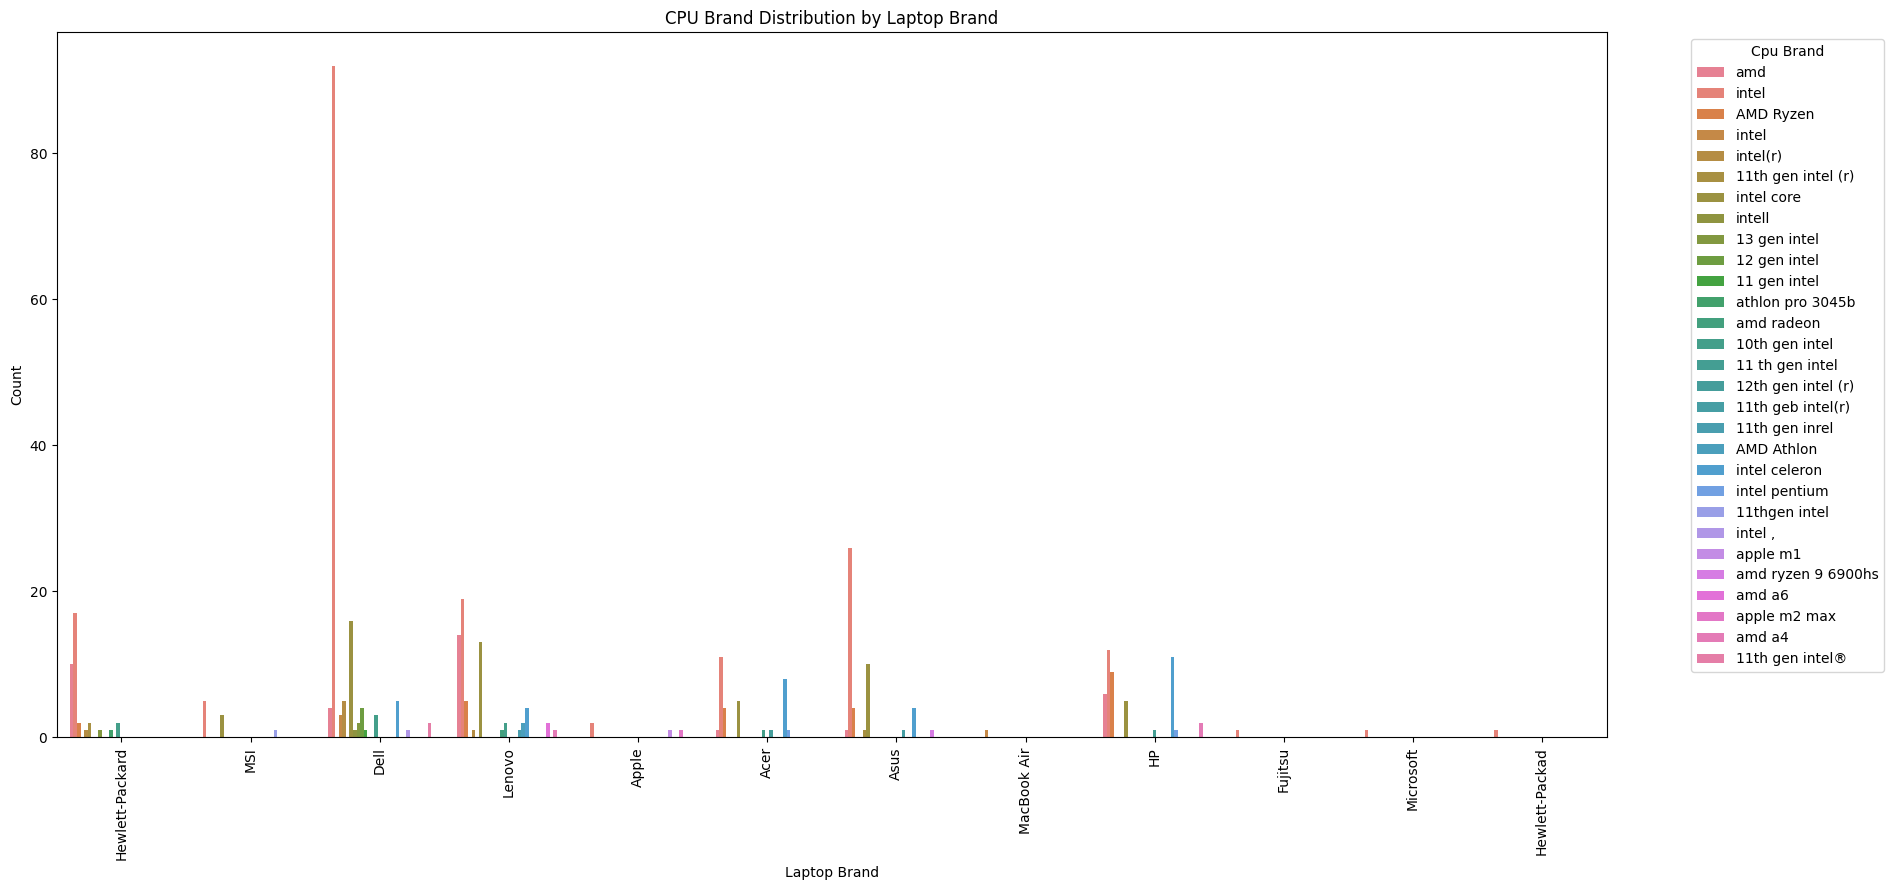

In [322]:
plt.figure(figsize=(19, 9))
sns.countplot(x='Company', hue='Cpu Brand', data=combined_df)
plt.title('CPU Brand Distribution by Laptop Brand')
plt.xlabel('Laptop Brand')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Cpu Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Unique Feature

# unique laptop model by Brand

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\4206573325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='ScreenResolution', data=unique_screen_resolutions, palette='muted')


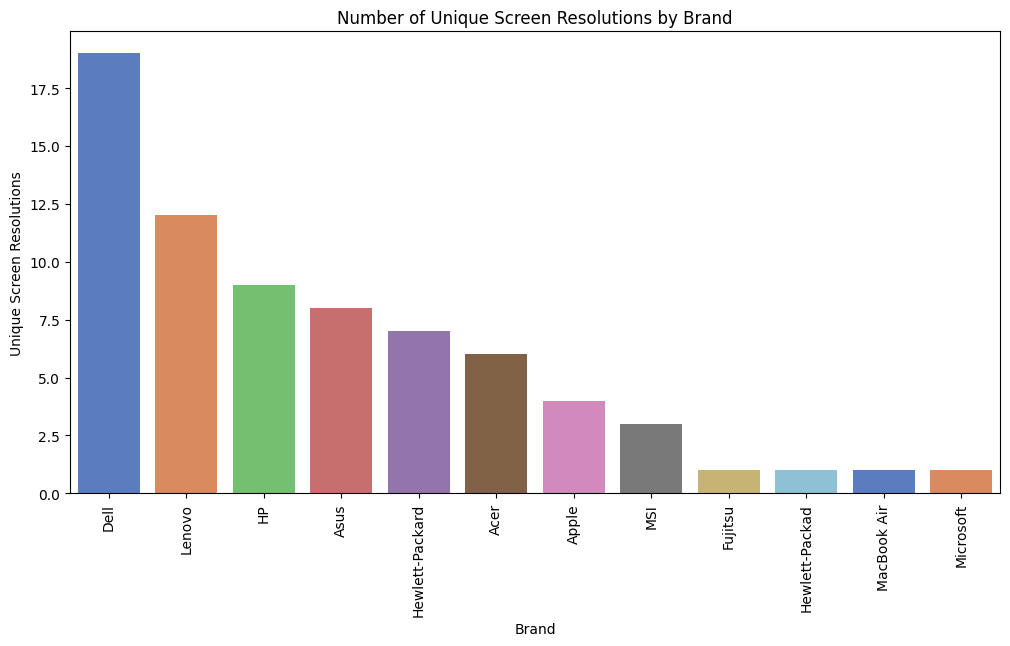

In [309]:

unique_screen_resolutions = combined_df.groupby('Company')['ScreenResolution'].nunique().reset_index()

unique_screen_resolutions = unique_screen_resolutions.sort_values(by='ScreenResolution', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='ScreenResolution', data=unique_screen_resolutions, palette='muted')
plt.title('Number of Unique Screen Resolutions by Brand')
plt.xlabel('Brand')
plt.ylabel('Unique Screen Resolutions')
plt.xticks(rotation=90)
plt.show()

# Unique CPU models by Brand

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\446812864.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Cpu Model', data=unique_cpu_models, palette='Set1')


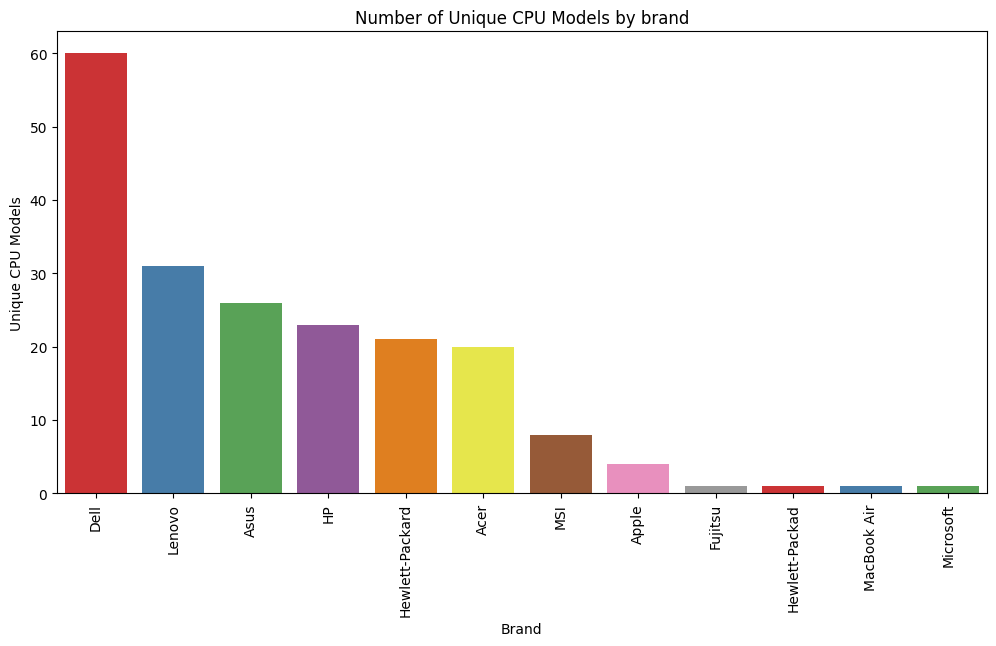

In [310]:
unique_cpu_models = combined_df.groupby('Company')['Cpu Model'].nunique().reset_index()
unique_cpu_models = unique_cpu_models.sort_values(by='Cpu Model', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Cpu Model', data=unique_cpu_models, palette='Set1')
plt.title('Number of Unique CPU Models by brand')
plt.xlabel('Brand')
plt.ylabel('Unique CPU Models')
plt.xticks(rotation=90)
plt.show()

C:\Users\AutoCad\AppData\Local\Temp\ipykernel_4808\1680083636.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='ScreenResolution', data=unique_screen_resolutions, palette='muted')


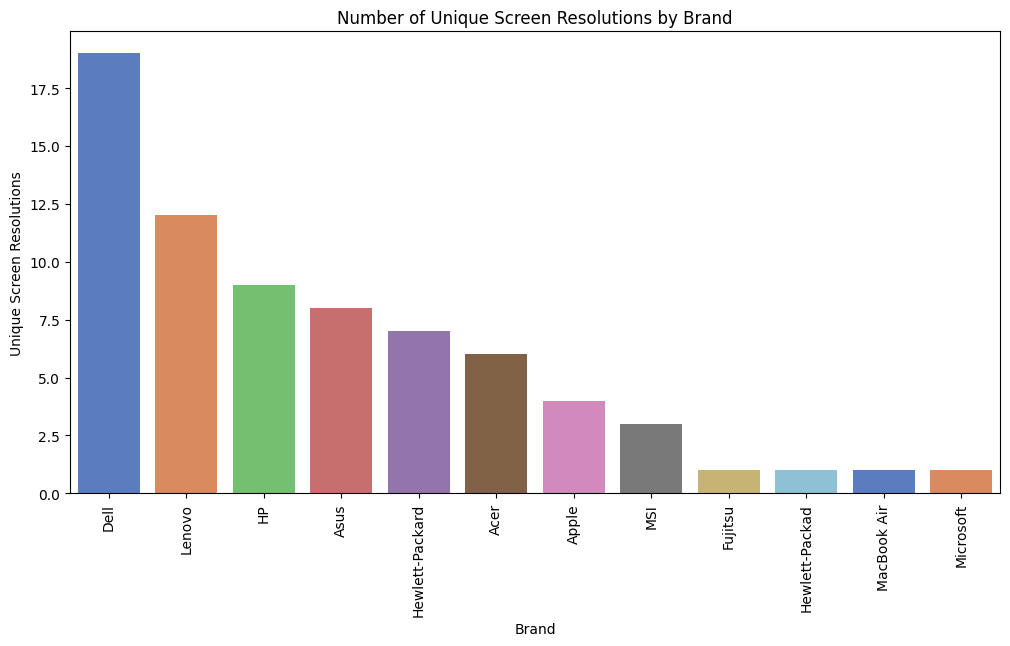

In [311]:

unique_screen_resolutions = combined_df.groupby('Company')['ScreenResolution'].nunique().reset_index()
unique_screen_resolutions = unique_screen_resolutions.sort_values(by='ScreenResolution', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='ScreenResolution', data=unique_screen_resolutions, palette='muted')
plt.title('Number of Unique Screen Resolutions by Brand')
plt.xlabel('Brand')
plt.ylabel('Unique Screen Resolutions')
plt.xticks(rotation=90)
plt.show()

# Unique Price Segments by CPU Brand




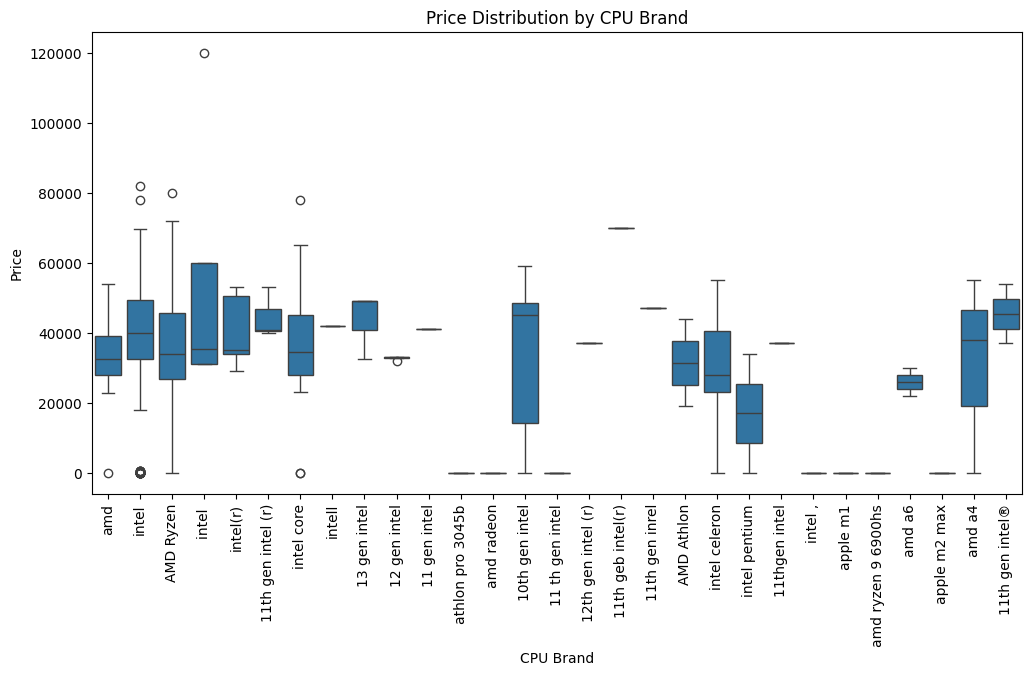

In [312]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cpu Brand', y='Price_Nu', data=combined_df)
plt.title('Price Distribution by CPU Brand')
plt.xlabel('CPU Brand')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

# Task-Based Distrubution Bar plot

<Figure size 1000x600 with 0 Axes>

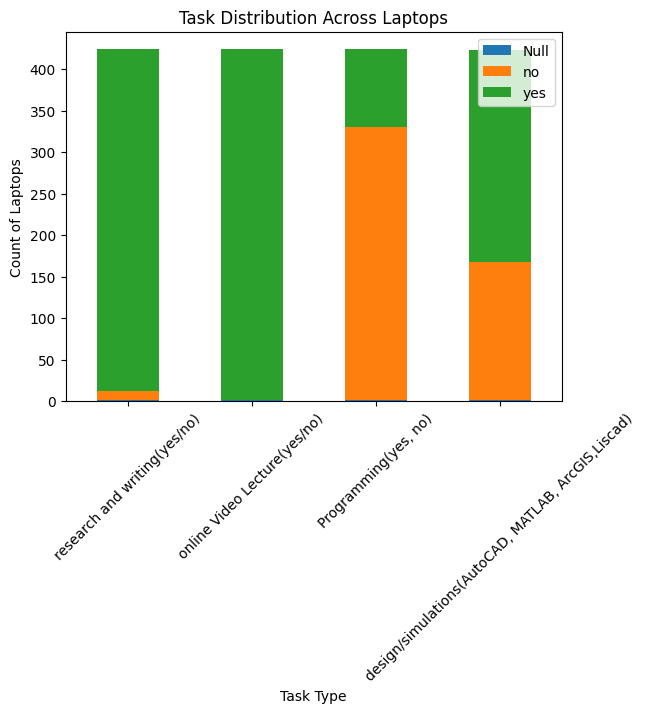

In [313]:

task_columns = ['research and writing(yes/no)', 'online Video Lecture(yes/no)', 'Programming(yes, no)', 'design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)']
plt.figure(figsize=(10, 6))
combined_df1[task_columns].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True)
plt.title("Task Distribution Across Laptops")
plt.xlabel("Task Type")
plt.ylabel("Count of Laptops")
plt.xticks(rotation=45)
plt.show()


# Performance Issues by Task Type

<Figure size 1200x800 with 0 Axes>

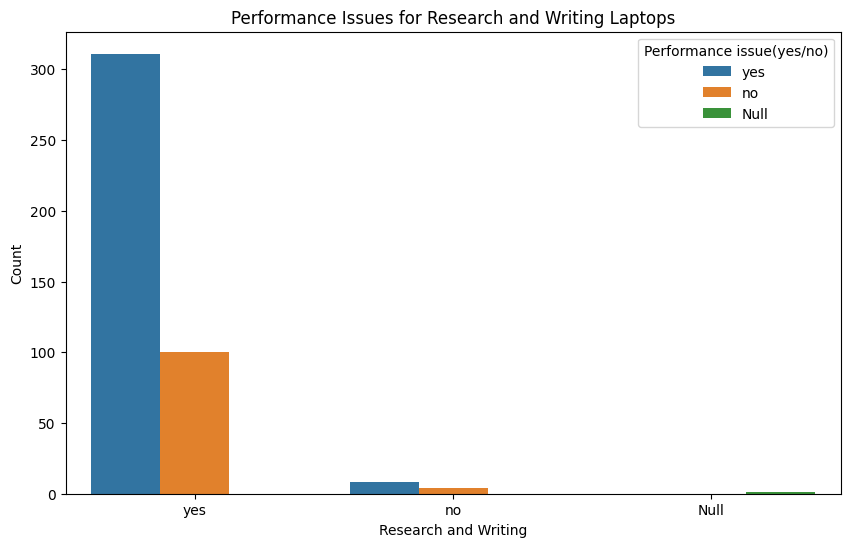

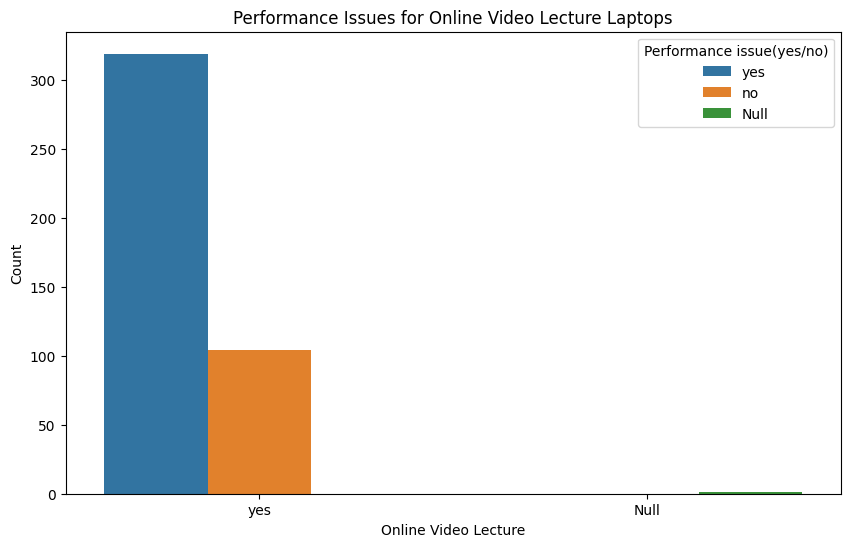

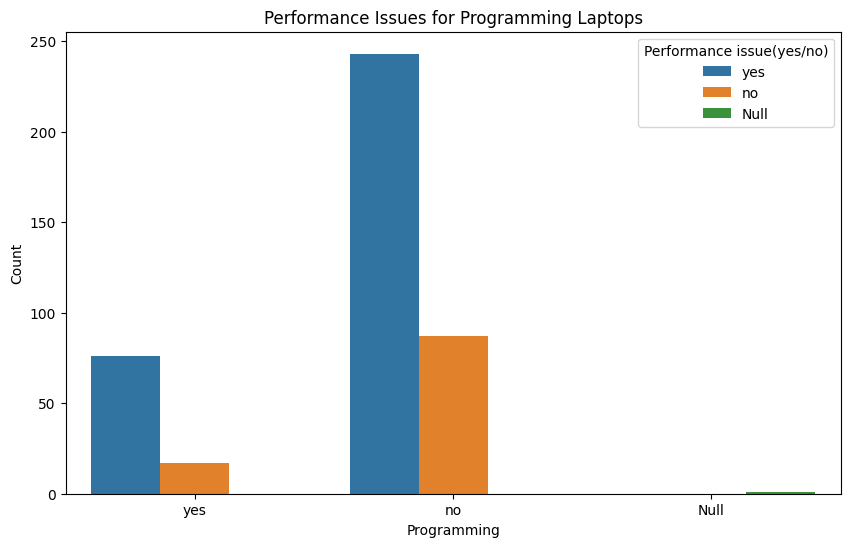

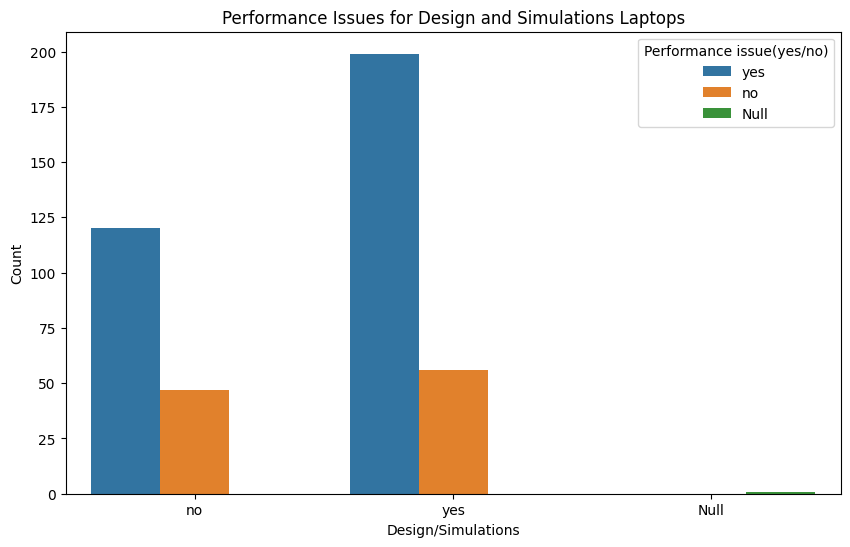

In [314]:
# Plot performance issues by task
plt.figure(figsize=(12, 8))

plt.figure(figsize=(10, 6))
sns.countplot(x='research and writing(yes/no)', hue='Performance issue(yes/no)', data=combined_df1)
plt.title("Performance Issues for Research and Writing Laptops")
plt.xlabel("Research and Writing")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='online Video Lecture(yes/no)', hue='Performance issue(yes/no)', data=combined_df1)
plt.title("Performance Issues for Online Video Lecture Laptops")
plt.xlabel("Online Video Lecture")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Programming(yes, no)', hue='Performance issue(yes/no)', data=combined_df1)
plt.title("Performance Issues for Programming Laptops")
plt.xlabel("Programming")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='design/simulations(AutoCAD, MATLAB, ArcGIS,Liscad)', hue='Performance issue(yes/no)', data=combined_df1)
plt.title("Performance Issues for Design and Simulations Laptops")
plt.xlabel("Design/Simulations")
plt.ylabel("Count")
plt.show()
